# COGS 108 - Parking Ticket Distribution in LA County

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Our project focuses on finding a correlation between the amount of parking tickets issued in different Los Angeles neighborhoods and demographics which include socioeconomic status and ethnic makeup. To conduct our research we used a parking citation dataset from Los Angeles county, which we modified to contain citations from 2018 to 2022, and a Median Income and AMI dataset which was used to establish socioeconomic status in the regions we examined. Our key results consisted of very low and low income AMI regions making up a large proportion of parking citations, with the moderate AMI being the least affected.  


# Final Video YouTube Link #

https://youtu.be/r_XoLzr-HrQ


# Names

- Sarah Borsotto
- Niharika Malhotra
- Marvin Ochoa Estrada
- Ann Luong
- Dhathry Doppalapudi

<a id='research_question'></a>
# Research Question

Are parking citations reported more in lower income areas than higher income areas? Is there a correlation between the amount of parking tickets issued in different regions of Los Angeles county and the AMI (area median income) category of those regions?

<a id='background'></a>

## Background & Prior Work

With 38 million people, California is the most populous state in the country, thus prompting an abundance of cars. Unfortunately for Californians, our state also has some of the highest fines for traffic and parking violations. A 2022 study by the San Francisco Bay Area Planning and Urban Research Association (SPUR)1 found that California drivers pay billions of dollars in traffic citations every year. These high fees and fines impose a significant financial strain on low-income Californians.

In addition, the California neighborhoods that struggle with poverty are mostly communities of color that potentially experience over-policing due to racial criminalization. Low-income neighborhoods are marginalized, leading to a significantly larger number of police officers present in those areas as opposed to communities on the upper end of the financial spectrum. This facilitates a space in which members of these communities are monitored constantly and are therefore more likely to receive traffic fines or parking tickets. Homeless people living in their cars are also targets of over-policing as they often reside in low-income neighborhoods. Parking tickets in turn further the financial instability that homeless people who live in their cars face, as tickets are unforgivable in California. The fees pile up and, as a result, a steady flow of traffic fines is generated in these low-income communities.

There have been numerous other projects and reports that studied over-policing and its consequences. A 2020 report by the University of Southern California utilized data from law enforcement agencies and found that people of color across Los Angeles County were stopped by the police at a higher rate than others2. Despite only being 9% of the city’s population, Black drivers were the target of 28% of Los Angeles police stops in the last half of 2018, according to another study. The issue is not only present in Los Angeles, as even 26% of San Francisco’s and 19% of San Diego’s police stops during that same time frame were Black drivers, while only 5% and 6% of those cities’ populations, respectively, are Black3.

Furthermore, an analysis of parking ticket distribution within Los Angeles revealed that a higher number of parking tickets were given in areas where more Black residents, renters, and young adults lived4. This suggests that the over-policing of people of color does not only apply to direct, face-to-face interactions with residents such as traffic stops or arrests. Latino and Black populations have the highest poverty rates across all racial/ethnic groups in California5, meaning that there is an overlap in the over-policing of neighborhoods of color and low-income neighborhoods.

This is important because it means that lower-income neighborhoods are being unfairly targeted; they are also the demographic who is least likely to be able to pay for the ticket. A parking ticket might be a nuisance to some, but to people in lower-income communities who are already struggling with poverty, it is an immense financial burden. If they are not able to find the money to pay the fee by a certain date, the burden increases and can eventually result in a criminal offense. This cycle contributes to the criminalization of poverty and is extremely unfair.

Particularly since the nationwide racial justice protests following George Floyd’s death in the summer of 2020, California counties have passed multiple police reform measures. However, it is uncertain whether these have actually brought about positive change.

1. San Francisco Bay Area Planning and Urban Research Association, 2022, The High Cost of Traffic Stops: An Analysis of Traffic Stops in Seven Jurisdictions across California, https://www.spur.org/publications/research/2022-10-06/high-cost-traffic-stops.
2. Painter, Gary, et al. NDSC Criminal Justice Data Initiative: Year 1 Wrap Report. https://socialinnovation.usc.edu/ndsccrimejusticereport/
3. “Black People in California Are Stopped Far More Often by Police, Major Study Proves.” The Guardian, Guardian News and Media, 3 Jan. 2020, https://www.theguardian.com/us-news/2020/jan/02/california-police-black-stops-force. 
4. Brazil, N. (2020). The Unequal Spatial Distribution of City Government Fines: The Case of Parking Tickets in Los Angeles. Urban Affairs Review, 56(3), 823–856. https://doi.org/10.1177/1078087418783609 
5. “Who's in Poverty in California?” Public Policy Institute of California, Public Policy Institute of California, 9 Nov. 2022, https://www.ppic.org/interactive/whos-in-poverty-in-california/.

# Hypothesis


We predict that there will be a proportionally larger number of parking tickets in lower income communities than in higher income communities. As such, we hypothesize that the amount of parking tickets decreases as the AMI category increases, meaning there should be fewer parking tickets for extremely low income areas than for above average income areas, as well as a gradual reduction in parking citations between these two extremes. We believe this may be due to over-policing in lower income neighborhoods.

# Dataset(s)

- Dataset Name: Parking Tickets - LA Open Data Portal
- Link to the dataset: https://data.lacity.org/Transportation/Parking-Citations/wjz9-h9np/data
- Number of observations: 15,858,773

Using Los Angeles’s Open Data Initiative, started by Mayor Eric Garceti in 2013, we can collect data about every parking ticket in the city of Los Angeles since the beginning of 2015. Relevant features of the dataset include longitude and latitude, street address, issue date, violation, state of license plate, make of the car, and the fine of the citation. 


- Dataset Name: Median Income and AMI
- Link to the dataset: https://geohub.lacity.org/datasets/lacounty::median-income-and-ami-census-tract/explore?location=33.774518%2C-118.302668%2C8.64&showTable=true 
- Number of observations: 2,495

Data on median household income and the corresponding AMI category for different areas in Los Angeles county. The appropriate columns for this dataset include median household income, ami category, and csa.

The street addresses will be utilized to map the areas between the median income dataset and LA Open Data parking ticket dataset. We essentially want to find the ami category for specific areas in the main parking ticket set.

# Setup

In [1]:
%pip install geopandas
%pip install shapely
%pip install pyshp

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 46 kB 4.1 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
sns.set(font_scale=2, style="white")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.rcParams['figure.figsize'] = (12, 5)

#Plots latitude and longitude points on a map
from shapely.geometry import Point, Polygon
import geopandas as gpd
from geopandas import GeoDataFrame

#Converts state plane coordinates to latitude and longitude
from pyproj import Proj, transform

import shapefile as shp
import plotly.graph_objects as go
%config InlineBackend.figure_format = 'retina'

from scipy.stats import chisquare

# Data Cleaning

### Parking Tickets - LA Open Data Portal

First, we will read in the parking ticket dataset and find out what information we can extract from it. 

Since, the parking citation dataset is too large to store on GitHub, we will only be showing our data cleaning process on a subset of this data. Our exploratory data analysis will still use the cleaned data from the original dataset, however.

In [3]:
citations = pd.read_csv(r"Parking_Citations_Subset.csv")

/tmp/ipykernel_162/2307732268.py:1: DtypeWarning: Columns (0,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  citations = pd.read_csv(r"Parking_Citations_Subset.csv")


In [6]:
print(citations.columns)
print('Shape:', citations.shape)
citations.head()

Index(['Ticket number', 'Issue Date', 'Issue time', 'Meter Id', 'Marked Time',
       'RP State Plate', 'Plate Expiry Date', 'VIN', 'Make', 'Body Style',
       'Color', 'Location', 'Route', 'Agency', 'Violation code',
       'Violation Description', 'Fine amount', 'Latitude', 'Longitude',
       'Agency Description', 'Color Description', 'Body Style Description'],
      dtype='object')
Shape: (80000, 22)


Ticket number  Issue Date  Issue time Meter Id  Marked Time RP State Plate  \
0    4266161336  09/09/2015       834.0      NaN          NaN             CA   
1    4271414125  11/12/2015      1929.0    BF759          NaN             CA   
2    4253402904  02/18/2015      1011.0      NaN          NaN             CA   
3    4258559896  05/06/2015      1109.0      NaN          NaN             CA   
4    4267414771  09/25/2015      1806.0    BH203          NaN             CA   

   Plate Expiry Date  VIN  Make Body Style  ...  Route Agency Violation code  \
0           201603.0  NaN  CHEV         PA  ...  00153   51.0         22502A   
1           201512.0  NaN  HOND         PA  ...  00474   54.0        88.13B+   
2           201509.0  NaN   KIA         PA  ...  00644   56.0       80.56E4+   
3               10.0  NaN  OTHR         CM  ...  00688   56.0        80.56E2   
4           201607.0  NaN  TOYT         PA  ...  00642   56.0        88.13B+   

   Violation Description Fine amount   Latitude  Longitude  \
0      18 IN. CURB/2 WAY        63.0  6430758.0  1840524.3   
1             METER EXP.        63.0  6452215.3  1851762.0   
2               RED ZONE        93.0  6480902.5  1846099.1   
3            YELLOW ZONE        58.0    99999.0    99999.0   
4             METER EXP.        63.0  6498368.6  1839669.7   

   Agency Description  Color Description Body Style Description  
0                 NaN                NaN                    NaN  
1                 NaN                NaN                    NaN  
2                 NaN                NaN                    NaN  
3                 NaN                NaN                    NaN  
4                 NaN                NaN                    NaN  

[5 rows x 22 columns]

Next, we are going to remove the columns that we don't need and then drop any rows that have missing values. The information that is of interest to us is:
- Ticket number
- Issue date
- State Plate
- Make
- Location
- Violation code
- Violation description
- Fine amount
- Latitude
- Longitude

In [8]:
citations = citations[['Ticket number', 'Issue Date', 'RP State Plate', 'Make', \
                       'Location', 'Violation code', 'Violation Description', 'Fine amount', \
                       'Latitude', 'Longitude']]
citations = citations.dropna()
print(citations.shape)
citations.head()

(77185, 10)


Ticket number  Issue Date RP State Plate  Make                     Location  \
0    4266161336  09/09/2015             CA  CHEV               1946 SELBY AVE   
1    4271414125  11/12/2015             CA  HOND             500 FAIRFAX AV N   
2    4253402904  02/18/2015             CA   KIA  107 SOUTH BURLINGTON AVENUE   
3    4258559896  05/06/2015             CA  OTHR              860 SANTEE ST S   
4    4267414771  09/25/2015             CA  TOYT     2300 CESAR E CHAVEZ AV E   

  Violation code Violation Description  Fine amount   Latitude  Longitude  
0         22502A     18 IN. CURB/2 WAY         63.0  6430758.0  1840524.3  
1        88.13B+            METER EXP.         63.0  6452215.3  1851762.0  
2       80.56E4+              RED ZONE         93.0  6480902.5  1846099.1  
3        80.56E2           YELLOW ZONE         58.0    99999.0    99999.0  
4        88.13B+            METER EXP.         63.0  6498368.6  1839669.7

Now, we are going to extract the year that each ticket was issued to make it easier to filter the data.

In [9]:
citations['year'] = pd.to_datetime(citations['Issue Date'], format='%m/%d/%Y').dt.year
citations.head()

Ticket number  Issue Date RP State Plate  Make                     Location  \
0    4266161336  09/09/2015             CA  CHEV               1946 SELBY AVE   
1    4271414125  11/12/2015             CA  HOND             500 FAIRFAX AV N   
2    4253402904  02/18/2015             CA   KIA  107 SOUTH BURLINGTON AVENUE   
3    4258559896  05/06/2015             CA  OTHR              860 SANTEE ST S   
4    4267414771  09/25/2015             CA  TOYT     2300 CESAR E CHAVEZ AV E   

  Violation code Violation Description  Fine amount   Latitude  Longitude  \
0         22502A     18 IN. CURB/2 WAY         63.0  6430758.0  1840524.3   
1        88.13B+            METER EXP.         63.0  6452215.3  1851762.0   
2       80.56E4+              RED ZONE         93.0  6480902.5  1846099.1   
3        80.56E2           YELLOW ZONE         58.0    99999.0    99999.0   
4        88.13B+            METER EXP.         63.0  6498368.6  1839669.7   

   year  
0  2015  
1  2015  
2  2015  
3  2015  
4  2015

We're only interested in looking at data from the past 5 years, so we're only going to look at entries in which the issue year is between 2018 and 2022 (inclusive).

In [10]:
citations = citations[citations['year'].isin(range(2018,2023)) == True]
print(citations.shape)
citations['year'].value_counts()

(47254, 11)


2018    9982
2019    9788
2022    9293
2020    9290
2021    8901
Name: year, dtype: int64

In [12]:
citations.sort_values(by='Latitude').head()

Ticket number  Issue Date RP State Plate  Make  \
63455    4524023350  01/26/2021             CA  HOND   
39505    4337278050  07/29/2018             CA  ACUR   
63556    4530894351  06/24/2021             CA  TOYT   
63565    4532701191  07/06/2021             CA   BMW   
32760    4335410634  07/20/2018             CA  MERZ   

                        Location Violation code  \
63455           934 MCDONALD AVE        80.69BS   
39505             11730 ERWIN ST         5204A-   
63556             8371 BALBOA AV          80.70   
63565            5700 BALCOM AVE        80.69BS   
32760  635 NORTH HAYWORTH AVENUE         80.69B   

                Violation Description  Fine amount  Latitude  Longitude  year  
63455            NO PARK/STREET CLEAN         73.0   99999.0    99999.0  2021  
39505                 DISPLAY OF TABS         25.0   99999.0    99999.0  2018  
63556  NO STOPPING/ANTI-GRIDLOCK ZONE        163.0   99999.0    99999.0  2021  
63565            NO PARK/STREET CLEAN         73.0   99999.0    99999.0  2021  
32760                      NO PARKING         73.0   99999.0    99999.0  2018

When looking at `citations.head`, you can see that there are a lot of invalid latitude and longitude coordinates (longitude and latitude are 99999). You can also see that the coordinates are represented with the California Zone 5 State Plane Coordinate System instead of the regular longitude and latitude coordinates that we are used to. We need the latitude and longitude coordinates to plot the location of the tickets on a map, so for now we are only going to look at entries with valid State Plane coordinates and convert them to the proper values.

In [13]:
citations = citations[citations['Longitude'] != 99999]
print(citations.shape)
citations.head()

(43651, 11)


Ticket number  Issue Date RP State Plate  Make             Location  \
30000    4337010996  08/28/2018             CA  MERZ   800 SWEETZER AVE N   
30001    4341394805  10/11/2018             CA  NISS  4077 MISSION ROAD N   
30002    4328977435  03/26/2018             CA  TOYT       2201 BUTLER AV   
30003    4338522016  08/20/2018             CA  TOYT  7356 HOLLYWOOD BLVD   
30004    4345254185  12/16/2018             CA  MITS     1201 INGRAHAM ST   

      Violation code Violation Description  Fine amount      Latitude  \
30000       80.56E4+              RED ZONE         93.0  6.449564e+06   
30001       80.56E4+              RED ZONE         93.0  6.502592e+06   
30002        88.13B+            METER EXP.         63.0  6.427126e+06   
30003       80.69AP+      NO STOP/STANDING         93.0  6.455583e+06   
30004         5204A-       DISPLAY OF TABS         25.0  6.481294e+06   

          Longitude  year  
30000  1.853668e+06  2018  
30001  1.850105e+06  2018  
30002  1.835964e+06  2018  
30003  1.859553e+06  2018  
30004  1.841501e+06  2018

In our original dataset, there were over 7 million entries left at this point in our data cleaning. Doing the conversion for every entry would take multiple days for our computers to run so we're only going to look at 5000 entries from each year. However, for the sake of runtime, we will only be showing the rest of our data cleaning process on 1000 entries from each year.

In [14]:
citations2018 = citations[citations['year'] == 2018]
citations2018 = citations2018.sample(frac = 1) # shuffle the data
citations2018 = citations2018.head(1000)

In [15]:
citations2019 = citations[citations['year'] == 2019]
citations2019 = citations2019.sample(frac = 1)
citations2019 = citations2019.head(1000)

In [16]:
citations2020 = citations[citations['year'] == 2020]
citations2020 = citations2020.sample(frac = 1)
citations2020 = citations2020.head(1000)

In [17]:
citations2021 = citations[citations['year'] == 2021]
citations2021 = citations2021.sample(frac = 1)
citations2021 = citations2021.head(1000)

In [18]:
citations2022 = citations[citations['year'] == 2022]
citations2022 = citations2022.sample(frac = 1)
citations2022 = citations2022.head(1000)

In [19]:
citations = pd.concat([citations2018, citations2019, citations2020, citations2021, \
                       citations2022])
# we should have 5,000 entries (the dataset we will use for our EDA will have 25,000 entries)
citations.shape

(5000, 11)

In [20]:
citations['year'].value_counts()

2018    1000
2019    1000
2020    1000
2021    1000
2022    1000
Name: year, dtype: int64

In [21]:
citations.head()

Ticket number  Issue Date RP State Plate  Make         Location  \
39117    4327554895  03/08/2018             CA   BMW   11700 OHIO AVE   
32263    4329086112  03/14/2018             CA  VOLK  2337 PENMAR AVE   
30239    4339947290  09/10/2018             CA  MAZD  14625 ALBERS ST   
38329    4331169544  04/27/2018             CA  NISS  2915 GUIRADO ST   
36988    4335415630  07/12/2018             CA  HOND      5709 HUB ST   

      Violation code Violation Description  Fine amount      Latitude  \
39117         5204A-       DISPLAY OF TABS         25.0  6.423336e+06   
32263        80.69BS  NO PARK/STREET CLEAN         73.0  6.424818e+06   
30239        80.69BS  NO PARK/STREET CLEAN         73.0  6.425119e+06   
38329        80.69BS  NO PARK/STREET CLEAN         73.0  6.498867e+06   
36988        80.69BS  NO PARK/STREET CLEAN         73.0  6.502814e+06   

          Longitude  year  
39117  1.838865e+06  2018  
32263  1.821008e+06  2018  
30239  1.884663e+06  2018  
38329  1.834367e+06  2018  
36988  1.864621e+06  2018

Now that we have reduced our dataset to a size that we can work with, we can convert all of the state coordinates to latitude and longitude coordinates.

In [22]:
# inProj: the current coordinate system (CA Zone 5)
inProj = Proj(init='epsg:2229', preserve_units = True)
# outProj: the coordinate system that we want (latitude/longitude)
outProj = Proj(init='epsg:4326')
count = 0

for index in citations.index:
    x = citations.loc[index, 'Latitude']
    y = citations.loc[index, 'Longitude']
    new_lon, new_lat = transform(inProj, outProj, x, y)
    citations.loc[index, 'Longitude'] = new_lon
    citations.loc[index, 'Latitude'] = new_lat
    count += 1
    if count % 1000 == 0:
        print(count) # track progress

/home/sborsott/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/sborsott/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_162/4096662572.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  new_lon, new_lat = trans

1000
2000
3000
4000
5000


### Median Income and AMI Dataset Cleaning

Now we will explore the median income and ami dataset so that we can better establish socioeconomic status later on.

We will begin by reading in the data.

In [24]:
# get the median income and ami geoJSON file which includes info about the 
# boundaries of each city
ami = gpd.read_file(r"Median_Income_and_AMI_(census_tract).geojson")
ami

tract  med_hh_income  med_hh_income_universe  \
0     06037199700        38892.0                    1204   
1     06037199801        41027.0                     903   
2     06037199802        42500.0                     612   
3     06037199900        37232.0                     845   
4     06037201110        65000.0                     782   
...           ...            ...                     ...   
2490  06037554516       126450.0                    1215   
2491  06037554517       107672.0                    1352   
2492  06037554518       104439.0                    1558   
2493  06037554519       131012.0                    1216   
2494  06037554521        90280.0                    1863   

               ami_category below_med_income below_60pct_med_income  \
0           Very Low Income              Yes                    Yes   
1           Very Low Income              Yes                    Yes   
2           Very Low Income              Yes                    Yes   
3           Very Low Income              Yes                    Yes   
4                Low Income              Yes                     No   
...                     ...              ...                    ...   
2490  Above Moderate Income               No                     No   
2491  Above Moderate Income               No                     No   
2492  Above Moderate Income               No                     No   
2493  Above Moderate Income               No                     No   
2494             Low Income               No                     No   

     below_moderate_income    sup_dist                               csa  \
0                      Yes  District 1  Los Angeles - Wholesale District   
1                      Yes  District 1     Los Angeles - Lincoln Heights   
2                      Yes  District 1     Los Angeles - Lincoln Heights   
3                      Yes  District 1     Los Angeles - Lincoln Heights   
4                      Yes  District 1           Los Angeles - El Sereno   
...                    ...         ...                               ...   
2490                    No  District 4                  City of Cerritos   
2491                    No  District 4                  City of Cerritos   
2492                    No  District 4                  City of Cerritos   
2493                    No  District 4                  City of Cerritos   
2494                   Yes  District 4                  City of Cerritos   

                spa  ESRI_OID   Shape__Area  Shape__Length  \
0     SPA 4 - Metro      2347  1.041050e+07   13808.463241   
1     SPA 4 - Metro      2348  3.724107e+06    9459.391827   
2     SPA 4 - Metro      2349  3.296129e+06    8868.744225   
3     SPA 4 - Metro      2350  4.782361e+06   10141.728022   
4     SPA 4 - Metro      2351  1.099246e+07   15893.383636   
...             ...       ...           ...            ...   
2490   SPA 7 - East      4837  1.555650e+07   21274.227408   
2491   SPA 7 - East      4838  1.421767e+07   15905.089174   
2492   SPA 7 - East      4839  1.938903e+07   21218.412991   
2493   SPA 7 - East      4840  1.866694e+07   19500.866806   
2494   SPA 7 - East      4841  5.352220e+07   37625.839752   

                                               geometry  
0     POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
1     POLYGON ((-118.21559 34.07186, -118.21169 34.0...  
2     POLYGON ((-118.21563 34.07365, -118.21309 34.0...  
3     POLYGON ((-118.21528 34.06349, -118.21547 34.0...  
4     POLYGON ((-118.18182 34.09277, -118.18039 34.0...  
...                                                 ...  
2490  POLYGON ((-118.07225 33.85452, -118.07047 33.8...  
2491  POLYGON ((-118.06374 33.86586, -118.05352 33.8...  
2492  POLYGON ((-118.04646 33.87326, -118.03776 33.8...  
2493  POLYGON ((-118.06362 33.85858, -118.05495 33.8...  
2494  POLYGON ((-118.10858 33.88694, -118.10828 33.8...  

[2495 rows x 14 columns]

We know that median income and AMI dataset has statistics for median household income and the corresponding AMI category, but what else does it include? Let's take a look.

In [25]:
ami.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199801        41027.0                     903  Very Low Income   
2  06037199802        42500.0                     612  Very Low Income   
3  06037199900        37232.0                     845  Very Low Income   
4  06037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro      2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro      2351  1.099246e+07   

   Shape__Length                                           geometry  
0   13808.463241  POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
1    9459.391827  POLYGON ((-118.21559 34.07186, -118.21169 34.0...  
2    8868.744225  POLYGON ((-118.21563 34.07365, -118.21309 34.0...  
3   10141.728022  POLYGON ((-118.21528 34.06349, -118.21547 34.0...  
4   15893.383636  POLYGON ((-118.18182 34.09277, -118.18039 34.0...

What about the size of the dataset?

In [26]:
ami.shape

(2495, 14)

This means that there are currently 2495 observations in our data, with 14 different categories. What can these categories tell us?

In [27]:
ami.columns

Index(['tract', 'med_hh_income', 'med_hh_income_universe', 'ami_category',
       'below_med_income', 'below_60pct_med_income', 'below_moderate_income',
       'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length',
       'geometry'],
      dtype='object')

In [28]:
ami.describe()

med_hh_income  med_hh_income_universe     ESRI_OID   Shape__Area  \
count    2458.000000             2495.000000  2495.000000  2.495000e+03   
mean    76849.334418             1335.672946  3594.000000  4.579716e+07   
std     35546.132788              533.910989   720.388784  4.270580e+08   
min      4918.000000                0.000000  2347.000000  4.836532e+05   
25%     51157.500000              988.000000  2970.500000  5.921008e+06   
50%     69698.000000             1282.000000  3594.000000  1.025761e+07   
75%     94515.500000             1625.000000  4217.500000  1.835792e+07   
max    250001.000000             5617.000000  4841.000000  1.608691e+10   

       Shape__Length  
count    2495.000000  
mean    20273.817017  
std     34074.651234  
min      2815.257443  
25%     10607.040729  
50%     14365.057033  
75%     19904.426714  
max    915242.577112

Looks like more than half of the columns are categorical. What are the other types of data?

In [29]:
# finding types of each column
ami.dtypes

tract                       object
med_hh_income              float64
med_hh_income_universe       int64
ami_category                object
below_med_income            object
below_60pct_med_income      object
below_moderate_income       object
sup_dist                    object
csa                         object
spa                         object
ESRI_OID                     int64
Shape__Area                float64
Shape__Length              float64
geometry                  geometry
dtype: object

In [30]:
ami.index

RangeIndex(start=0, stop=2495, step=1)

Something that will be important for our analysis later on is identifying median income for specific regions. Let's take a look at the different locations in this dataset.

In [31]:
ami['csa'].unique()

array(['Los Angeles - Wholesale District',
       'Los Angeles - Lincoln Heights', 'Los Angeles - El Sereno',
       'Los Angeles - Highland Park', 'Los Angeles - University Hills',
       'Los Angeles - Boyle Heights', 'City of Pomona',
       'City of Diamond Bar', 'Unincorporated - Rowland Heights',
       'City of Industry', 'City of Walnut', 'Unincorporated - Covina',
       'City of Covina', 'City of San Dimas',
       'Unincorporated - Covina (Charter Oak)', 'City of Glendora',
       'Unincorporated - Azusa', 'City of Azusa', 'City of Norwalk',
       'City of Artesia', 'City of Lakewood', 'City of Hawaiian Gardens',
       'City of Long Beach', 'City of Cerritos',
       'Los Angeles - Little Tokyo', 'Los Angeles - Chinatown',
       'Los Angeles - Downtown', 'Los Angeles - Temple-Beaudry',
       'Los Angeles - Historic Filipinotown', 'Los Angeles - Westlake',
       'City of Irwindale', 'City of Baldwin Park', 'City of West Covina',
       'City of Signal Hill', 'Los Angeles

Since all of our data is from Los Angeles, we can just look at the city instead.

In [32]:
# function to single out the city/community from the string
def standardize_city(city):
    if ' - ' in city:
        idx = city.index('- ')
    else:
        idx = -2
    return city[idx+2:]

ami['csa'] = ami['csa'].apply(standardize_city)

In [33]:
ami.head()

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199801        41027.0                     903  Very Low Income   
2  06037199802        42500.0                     612  Very Low Income   
3  06037199900        37232.0                     845  Very Low Income   
4  06037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                  csa            spa  ESRI_OID   Shape__Area  Shape__Length  \
0  Wholesale District  SPA 4 - Metro      2347  1.041050e+07   13808.463241   
1     Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06    9459.391827   
2     Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06    8868.744225   
3     Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   10141.728022   
4           El Sereno  SPA 4 - Metro      2351  1.099246e+07   15893.383636   

                                            geometry  
0  POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
1  POLYGON ((-118.21559 34.07186, -118.21169 34.0...  
2  POLYGON ((-118.21563 34.07365, -118.21309 34.0...  
3  POLYGON ((-118.21528 34.06349, -118.21547 34.0...  
4  POLYGON ((-118.18182 34.09277, -118.18039 34.0...

We should also check for null values.

In [34]:
# checking if csa column has nans
ami['csa'].hasnans

False

In [35]:
# checking if ami category column has nans
ami['ami_category'].hasnans

True

In [36]:
#checking if median_hh_income has nans
ami['med_hh_income'].hasnans

True

In [37]:
# finding all the rows in the dataframe where med_hh_income column is NaN
ami.loc[ami['med_hh_income'].isna()]

tract  med_hh_income  med_hh_income_universe ami_category  \
446   06037216301            NaN                     614         None   
502   06037578100            NaN                       0         None   
504   06037599100            NaN                      79         None   
761   06037222700            NaN                     108         None   
896   06037115103            NaN                      11         None   
1458  06037265301            NaN                       0         None   
1560  06037901003            NaN                       0         None   
1658  06037273403            NaN                    1020         None   
2052  06037920200            NaN                       0         None   
2072  06037980001            NaN                       0         None   
2073  06037980002            NaN                       0         None   
2074  06037980003            NaN                       0         None   
2075  06037980004            NaN                       0         None   
2076  06037980005            NaN                       0         None   
2077  06037980006            NaN                       0         None   
2078  06037980007            NaN                       0         None   
2079  06037980008            NaN                      17         None   
2080  06037980009            NaN                       0         None   
2083  06037980012            NaN                       0         None   
2084  06037980013            NaN                       0         None   
2085  06037980014            NaN                      11         None   
2089  06037980018            NaN                       0         None   
2091  06037980020            NaN                       0         None   
2092  06037980021            NaN                      14         None   
2093  06037980022            NaN                       0         None   
2223  06037980023            NaN                       0         None   
2225  06037980026            NaN                       0         None   
2226  06037980028            NaN                       0         None   
2227  06037980030            NaN                       0         None   
2228  06037980031            NaN                      22         None   
2229  06037980033            NaN                      14         None   
2230  06037980034            NaN                       9         None   
2232  06037980036            NaN                     164         None   
2233  06037980037            NaN                       0         None   
2234  06037980038            NaN                       0         None   
2235  06037980039            NaN                       0         None   
2442  06037402404            NaN                       4         None   

     below_med_income below_60pct_med_income below_moderate_income  \
446              None                   None                  None   
502              None                   None                  None   
504              None                   None                  None   
761              None                   None                  None   
896              None                   None                  None   
1458             None                   None                  None   
1560             None                   None                  None   
1658             None                   None                  None   
2052             None                   None                  None   
2072             None                   None                  None   
2073             None                   None                  None   
2074             None                   None                  None   
2075             None                   None                  None   
2076             None                   None                  None   
2077             None                   None                  None   
2078             None                   None                  None   
2079             None                   None   

In [38]:
# all of the rows having NaN in the med_hh_income column have NaNs in ami_category
# below_med_income, below_60pct_med_income, and below_moderate_income as well
ami.loc[ ami['med_hh_income'].isna()].shape
ami.shape

(2495, 14)

In [39]:
# shape of df once dropping rows with NaN
ami.dropna().shape

(2458, 14)

In [40]:
# dropping rows with nans
ami.dropna(inplace = True)

In [41]:
ami['med_hh_income'].hasnans

False

In [42]:
ami['ami_category'].hasnans

False

In the csa column, many of the locations are described as 'City of...'. We will remove this description and only keep the name of the city instead, as that is the most relevant part.

In [43]:
ami['csa'].unique()

array(['Wholesale District', 'Lincoln Heights', 'El Sereno',
       'Highland Park', 'University Hills', 'Boyle Heights',
       'City of Pomona', 'City of Diamond Bar', 'Rowland Heights',
       'City of Industry', 'City of Walnut', 'Covina', 'City of Covina',
       'City of San Dimas', 'Covina (Charter Oak)', 'City of Glendora',
       'Azusa', 'City of Azusa', 'City of Norwalk', 'City of Artesia',
       'City of Lakewood', 'City of Hawaiian Gardens',
       'City of Long Beach', 'City of Cerritos', 'Little Tokyo',
       'Chinatown', 'Downtown', 'Temple-Beaudry', 'Historic Filipinotown',
       'Westlake', 'City of Irwindale', 'City of Baldwin Park',
       'City of West Covina', 'City of Signal Hill', 'Pico-Union',
       'Hancock Park', 'Wilshire Center', 'Little Bangladesh',
       'Koreatown', 'Bassett', 'City of La Puente', 'West Puente Valley',
       'Valinda', 'San Jose Hills', 'Avocado Heights', 'North Whittier',
       'Hacienda Heights', 'Tujunga', 'Sun Valley', 'Sunlan

In [45]:
# drop the 'City of' part of the string, as that is unnecessary
fncof = lambda x : x if 'City of ' not in x else x[8:]
ami['csa'] = ami['csa'].apply(fncof)

In [46]:
# checking the unique values
ami['csa'].unique()

array(['Wholesale District', 'Lincoln Heights', 'El Sereno',
       'Highland Park', 'University Hills', 'Boyle Heights', 'Pomona',
       'Diamond Bar', 'Rowland Heights', 'Industry', 'Walnut', 'Covina',
       'San Dimas', 'Covina (Charter Oak)', 'Glendora', 'Azusa',
       'Norwalk', 'Artesia', 'Lakewood', 'Hawaiian Gardens', 'Long Beach',
       'Cerritos', 'Little Tokyo', 'Chinatown', 'Downtown',
       'Temple-Beaudry', 'Historic Filipinotown', 'Westlake', 'Irwindale',
       'Baldwin Park', 'West Covina', 'Signal Hill', 'Pico-Union',
       'Hancock Park', 'Wilshire Center', 'Little Bangladesh',
       'Koreatown', 'Bassett', 'La Puente', 'West Puente Valley',
       'Valinda', 'San Jose Hills', 'Avocado Heights', 'North Whittier',
       'Hacienda Heights', 'Tujunga', 'Sun Valley', 'Sunland',
       'Lakeview Terrace', 'Shadow Hills', 'Pacoima', 'Country Club Park',
       'Melrose', 'Park La Brea', 'Carthay', 'Miracle Mile',
       'South Carthay', 'Crestview', 'Mid-city', 'La

Lastly, we can delete unnecessary columns.

In [48]:
ami = ami.drop(columns=['tract', 'ESRI_OID'])

Let's take a final look at our dataset!

In [49]:
ami.head()

med_hh_income  med_hh_income_universe     ami_category below_med_income  \
0        38892.0                    1204  Very Low Income              Yes   
1        41027.0                     903  Very Low Income              Yes   
2        42500.0                     612  Very Low Income              Yes   
3        37232.0                     845  Very Low Income              Yes   
4        65000.0                     782       Low Income              Yes   

  below_60pct_med_income below_moderate_income    sup_dist  \
0                    Yes                   Yes  District 1   
1                    Yes                   Yes  District 1   
2                    Yes                   Yes  District 1   
3                    Yes                   Yes  District 1   
4                     No                   Yes  District 1   

                  csa            spa   Shape__Area  Shape__Length  \
0  Wholesale District  SPA 4 - Metro  1.041050e+07   13808.463241   
1     Lincoln Heights  SPA 4 - Metro  3.724107e+06    9459.391827   
2     Lincoln Heights  SPA 4 - Metro  3.296129e+06    8868.744225   
3     Lincoln Heights  SPA 4 - Metro  4.782361e+06   10141.728022   
4           El Sereno  SPA 4 - Metro  1.099246e+07   15893.383636   

                                            geometry  
0  POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
1  POLYGON ((-118.21559 34.07186, -118.21169 34.0...  
2  POLYGON ((-118.21563 34.07365, -118.21309 34.0...  
3  POLYGON ((-118.21528 34.06349, -118.21547 34.0...  
4  POLYGON ((-118.18182 34.09277, -118.18039 34.0...

### Combining the datasets

The ami dataset has a category called `geometry` that stores a Polygon object.

In [50]:
ami.columns

Index(['med_hh_income', 'med_hh_income_universe', 'ami_category',
       'below_med_income', 'below_60pct_med_income', 'below_moderate_income',
       'sup_dist', 'csa', 'spa', 'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')

In [51]:
ami['geometry']

0       POLYGON ((-118.22672 34.06242, -118.22453 34.0...
1       POLYGON ((-118.21559 34.07186, -118.21169 34.0...
2       POLYGON ((-118.21563 34.07365, -118.21309 34.0...
3       POLYGON ((-118.21528 34.06349, -118.21547 34.0...
4       POLYGON ((-118.18182 34.09277, -118.18039 34.0...
                              ...                        
2490    POLYGON ((-118.07225 33.85452, -118.07047 33.8...
2491    POLYGON ((-118.06374 33.86586, -118.05352 33.8...
2492    POLYGON ((-118.04646 33.87326, -118.03776 33.8...
2493    POLYGON ((-118.06362 33.85858, -118.05495 33.8...
2494    POLYGON ((-118.10858 33.88694, -118.10828 33.8...
Name: geometry, Length: 2458, dtype: geometry

The geometry column tells us the boundaries of each city in the ami dataset. We can use the geometry column in the ami dataset and the longitude/latitude coordinates in the parking citations dataset to determine the city where the citation occurred. We can also get the average median income of that area.

In [52]:
# Takes in latitude/longitude coordinates and the geometry dataset as parameters
# Returns the location and ami of the latitude/longitude coordinates
def getRegion(lat, lon, df):
    for index in df.index:
        polygon = df.loc[index, 'geometry']
        point = Point(lon, lat)
        if polygon.contains(point) or polygon.touches(point):
            return [df.loc[index, 'csa'], df.loc[index, 'ami_category']]
    return [None, None]

In [53]:
cities = []
income = []
count = 0
for index in citations.index:
    lat = citations.loc[index, 'Latitude']
    lon = citations.loc[index, 'Longitude']
    amiRegion = getRegion(lat, lon, ami)
    csa = amiRegion[0]
    income_category = amiRegion[1]
    cities.append(csa)
    income.append(income_category)
    count += 1
    if count % 1000 == 0:
        print(count) # track progress

1000
2000
3000
4000
5000


Let's add the cities and their average median incomes to the parking citations dataset.

In [54]:
citations['csa'] = cities
citations['ami_category'] = income

In [55]:
citations.head()

Ticket number  Issue Date RP State Plate  Make         Location  \
39117    4327554895  03/08/2018             CA   BMW   11700 OHIO AVE   
32263    4329086112  03/14/2018             CA  VOLK  2337 PENMAR AVE   
30239    4339947290  09/10/2018             CA  MAZD  14625 ALBERS ST   
38329    4331169544  04/27/2018             CA  NISS  2915 GUIRADO ST   
36988    4335415630  07/12/2018             CA  HOND      5709 HUB ST   

      Violation code Violation Description  Fine amount   Latitude  \
39117         5204A-       DISPLAY OF TABS         25.0  34.044429   
32263        80.69BS  NO PARK/STREET CLEAN         73.0  33.995379   
30239        80.69BS  NO PARK/STREET CLEAN         73.0  34.170296   
38329        80.69BS  NO PARK/STREET CLEAN         73.0  34.032754   
36988        80.69BS  NO PARK/STREET CLEAN         73.0  34.115909   

        Longitude  year               csa           ami_category  
39117 -118.456627  2018  West Los Angeles  Above Moderate Income  
32263 -118.451472  2018            Venice  Above Moderate Income  
30239 -118.451421  2018      Sherman Oaks             Low Income  
38329 -118.207273  2018     Boyle Heights             Low Income  
36988 -118.194439  2018     Highland Park             Low Income

In [56]:
citations['csa'].unique()

array(['West Los Angeles', 'Venice', 'Sherman Oaks', 'Boyle Heights',
       'Highland Park', 'Silverlake', 'Westwood', 'Downtown', 'Westlake',
       'Lafayette Square', 'Van Nuys', 'Mid-city', 'Lincoln Heights',
       'Valley Glen', 'Chinatown', 'Harbor City', 'Hollywood Hills',
       'Temple-Beaudry', 'Studio City', 'Lake Balboa', 'Toluca Lake',
       'Koreatown', None, 'Elysian Park', 'Hollywood', 'Miracle Mile',
       'Atwater Village', 'Encino', 'Park La Brea', 'Mt. Washington',
       'Palms', 'Wholesale District', 'North Hollywood', 'Baldwin Hills',
       'South Park', 'Reseda', 'Melrose', 'Century City', 'Hancock Park',
       'West Vernon', 'Crestview', 'Century Palms/Cove', 'Eagle Rock',
       'University Park', 'Sun Valley', 'Tarzana',
       'Historic Filipinotown', 'Hyde Park', 'Carthay', 'Wilshire Center',
       'Cloverdale/Cochran', 'Los Feliz', 'Little Tokyo',
       'Vernon Central', 'Woodland Hills', 'Mar Vista', 'East Hollywood',
       'Rancho Park', 'El Seg

In [57]:
citations['ami_category'].unique()

array(['Above Moderate Income', 'Low Income', 'Very Low Income',
       'Extremely Low Income', None, 'Moderate Income'], dtype=object)

Let's check if the columns we just added contain any null values.

In [58]:
citations['csa'].hasnans

True

In [59]:
citations['ami_category'].hasnans

True

In [60]:
citations = citations.dropna()

In [61]:
citations['csa'].value_counts()

Downtown              370
Hollywood             274
Melrose               261
West Los Angeles      183
Wholesale District    164
                     ... 
Mandeville Canyon       1
El Segundo              1
West LA                 1
Willowbrook             1
Lakeview Terrace        1
Name: csa, Length: 136, dtype: int64

In [62]:
citations['ami_category'].value_counts()

Very Low Income          1663
Low Income               1535
Above Moderate Income    1061
Extremely Low Income      630
Moderate Income            44
Name: ami_category, dtype: int64

At this point, we have finished cleaning and merging both datasets! We should take a look at our final dataset and its size.

In [63]:
citations.shape

(4933, 13)

In [64]:
citations.head()

Ticket number  Issue Date RP State Plate  Make         Location  \
39117    4327554895  03/08/2018             CA   BMW   11700 OHIO AVE   
32263    4329086112  03/14/2018             CA  VOLK  2337 PENMAR AVE   
30239    4339947290  09/10/2018             CA  MAZD  14625 ALBERS ST   
38329    4331169544  04/27/2018             CA  NISS  2915 GUIRADO ST   
36988    4335415630  07/12/2018             CA  HOND      5709 HUB ST   

      Violation code Violation Description  Fine amount   Latitude  \
39117         5204A-       DISPLAY OF TABS         25.0  34.044429   
32263        80.69BS  NO PARK/STREET CLEAN         73.0  33.995379   
30239        80.69BS  NO PARK/STREET CLEAN         73.0  34.170296   
38329        80.69BS  NO PARK/STREET CLEAN         73.0  34.032754   
36988        80.69BS  NO PARK/STREET CLEAN         73.0  34.115909   

        Longitude  year               csa           ami_category  
39117 -118.456627  2018  West Los Angeles  Above Moderate Income  
32263 -118.451472  2018            Venice  Above Moderate Income  
30239 -118.451421  2018      Sherman Oaks             Low Income  
38329 -118.207273  2018     Boyle Heights             Low Income  
36988 -118.194439  2018     Highland Park             Low Income

# Data Analysis & Results

Now that we've finished cleaning our data, we can perform our analysis.

First, we should read in the cleaned data that we obtained from using the original parking citations dataset instead of a subset.

In [66]:
df = pd.read_csv('Cleaned_Parking_Citations.csv')
df.head()

Ticket number  Issue Date RP State Plate  Make             Location  \
0     4342135405  10/25/2018             CA  VOLK    701 FIGUEROA ST S   
1     4327834324  03/01/2018             CA  HOND      472 WITMER ST S   
2     4334705981  06/25/2018             UT  HOND  3101 BARRINGTON AVE   
3     4345709196  12/24/2018             CA  DODG      2712 COUNCIL ST   
4     4328607043  03/19/2018             CA  HOND    6538 BARTON AVE W   

  Violation code Violation Description  Fine amount   Latitude   Longitude  \
0       80.66.1D  RESTRICTED TAXI ZONE         68.0  34.049387 -118.259849   
1         80.69B            NO PARKING         73.0  34.056461 -118.265062   
2        80.69BS  NO PARK/STREET CLEAN         73.0  34.021283 -118.437544   
3        80.69BS  NO PARK/STREET CLEAN         73.0  34.071423 -118.276930   
4        80.69BS  NO PARK/STREET CLEAN         73.0  34.087722 -118.333752   

   year             csa          ami_category  
0  2018        Downtown            Low Income  
1  2018        Westlake  Extremely Low Income  
2  2018       Mar Vista       Moderate Income  
3  2018  Temple-Beaudry       Very Low Income  
4  2018         Melrose       Very Low Income

In [67]:
df.shape

(24646, 13)

Now, let's take a look at the relationship between number of parking tickets and ami category. First, we will construct a barchart of the number of parking tickets for different ami categories in order to depict the overall trend between the two variables.

What exactly is the range of ami categories?

In [68]:
df['ami_category'].unique()

array(['Low Income', 'Extremely Low Income', 'Moderate Income',
       'Very Low Income', 'Above Moderate Income'], dtype=object)

We will sort these in order in our barchart from lowest to highest, to more clearly show the trend we are investigating.

In [69]:
i_t = df['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]

income_tickets = {}
for i in i_t.index:
    income_tickets[i.replace(' Income', '')] = i_t[i]

income_tickets

{'Extremely Low': 2973,
 'Very Low': 8443,
 'Low': 7639,
 'Moderate': 230,
 'Above Moderate': 5361}

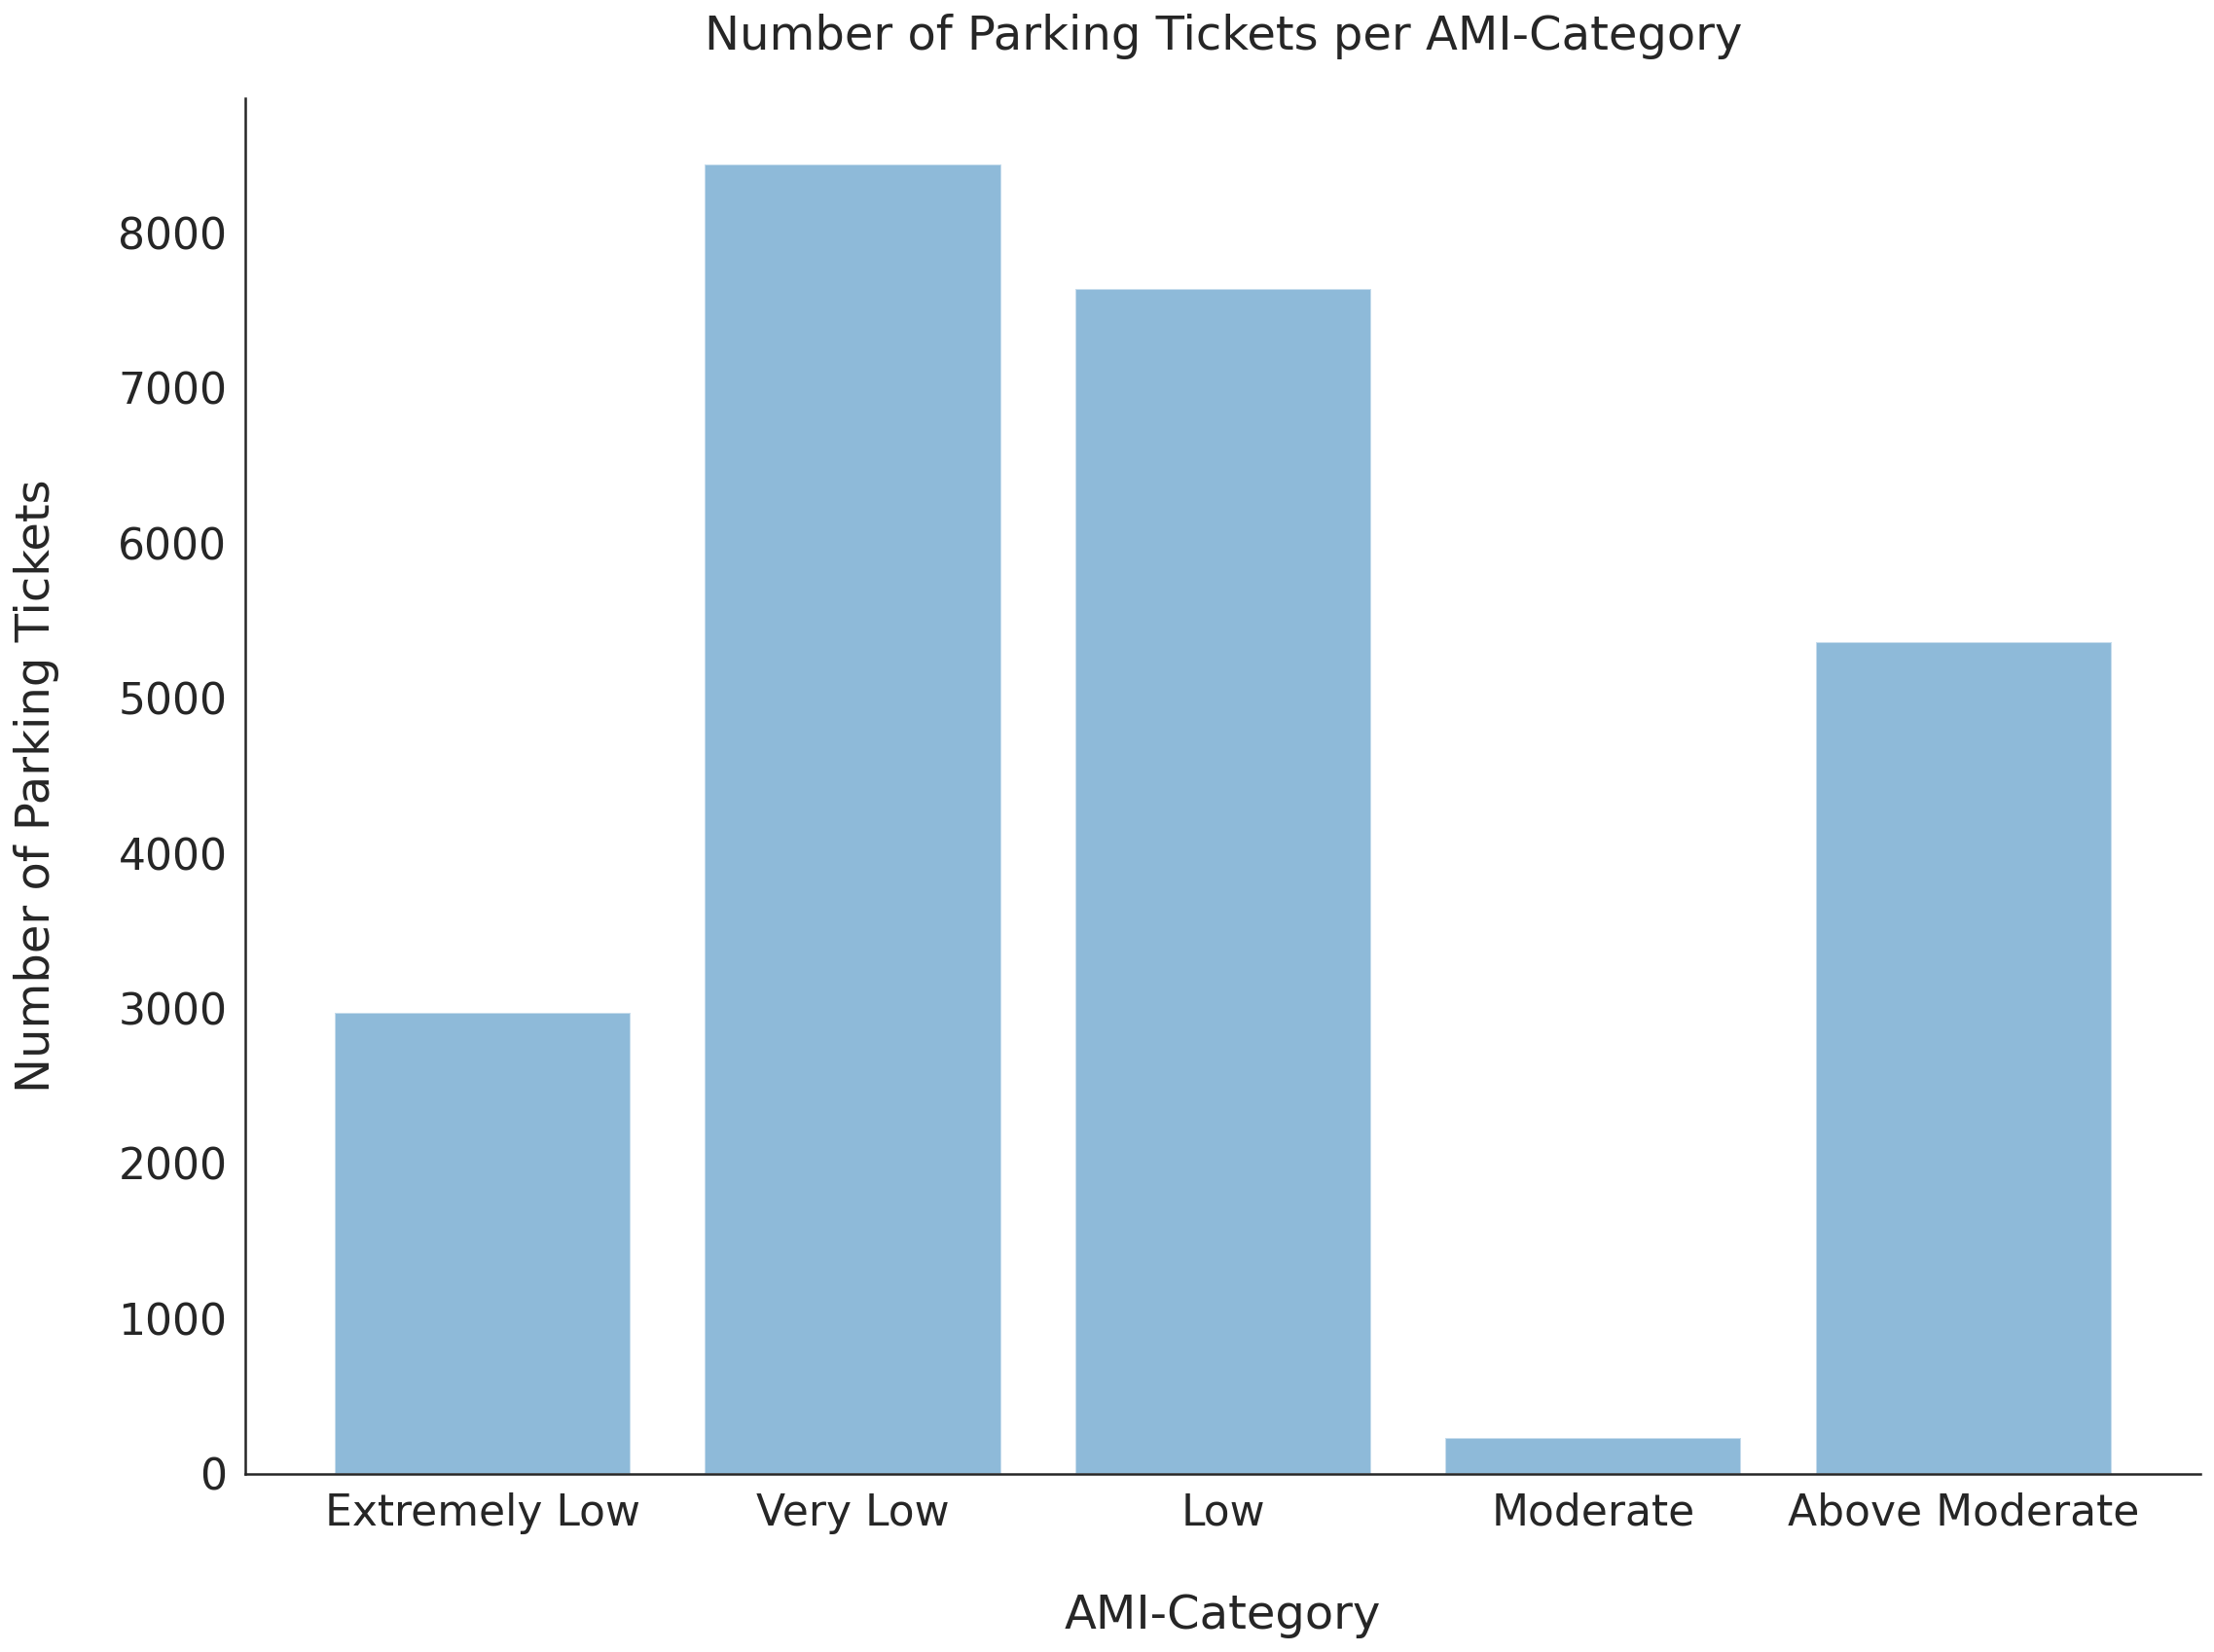

In [70]:
f1, ax = plt.subplots(figsize=(18,13))
ax.bar(income_tickets.keys(), income_tickets.values(), width=0.8, color='tab:blue', alpha=0.5)
ax.set_xlabel('AMI-Category', labelpad=30)
ax.set_ylabel('Number of Parking Tickets', labelpad=30)
ax.set_title('Number of Parking Tickets per AMI-Category', pad=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Well this is interesting! As it appears, the number of parking tickets are the highest for very low income areas, and the lowest for moderate income areas. Yet, the graph seems to outline a drastic drop in parking tickets from low income to moderate income, followed by a drastic increase in parking tickets for above moderate income. Why might this be? Could there be a bias in our data? Perhaps not much data was collected from moderate income communities. Or maybe there are less moderate income communities in LA in general (in comparison to the other income categories). We will be exploring these possibilities in our heatmap later on. For now, let's take a look at some other potential relationships between parking tickets and income levels. First, we should see the proportion of ami categories in LA.

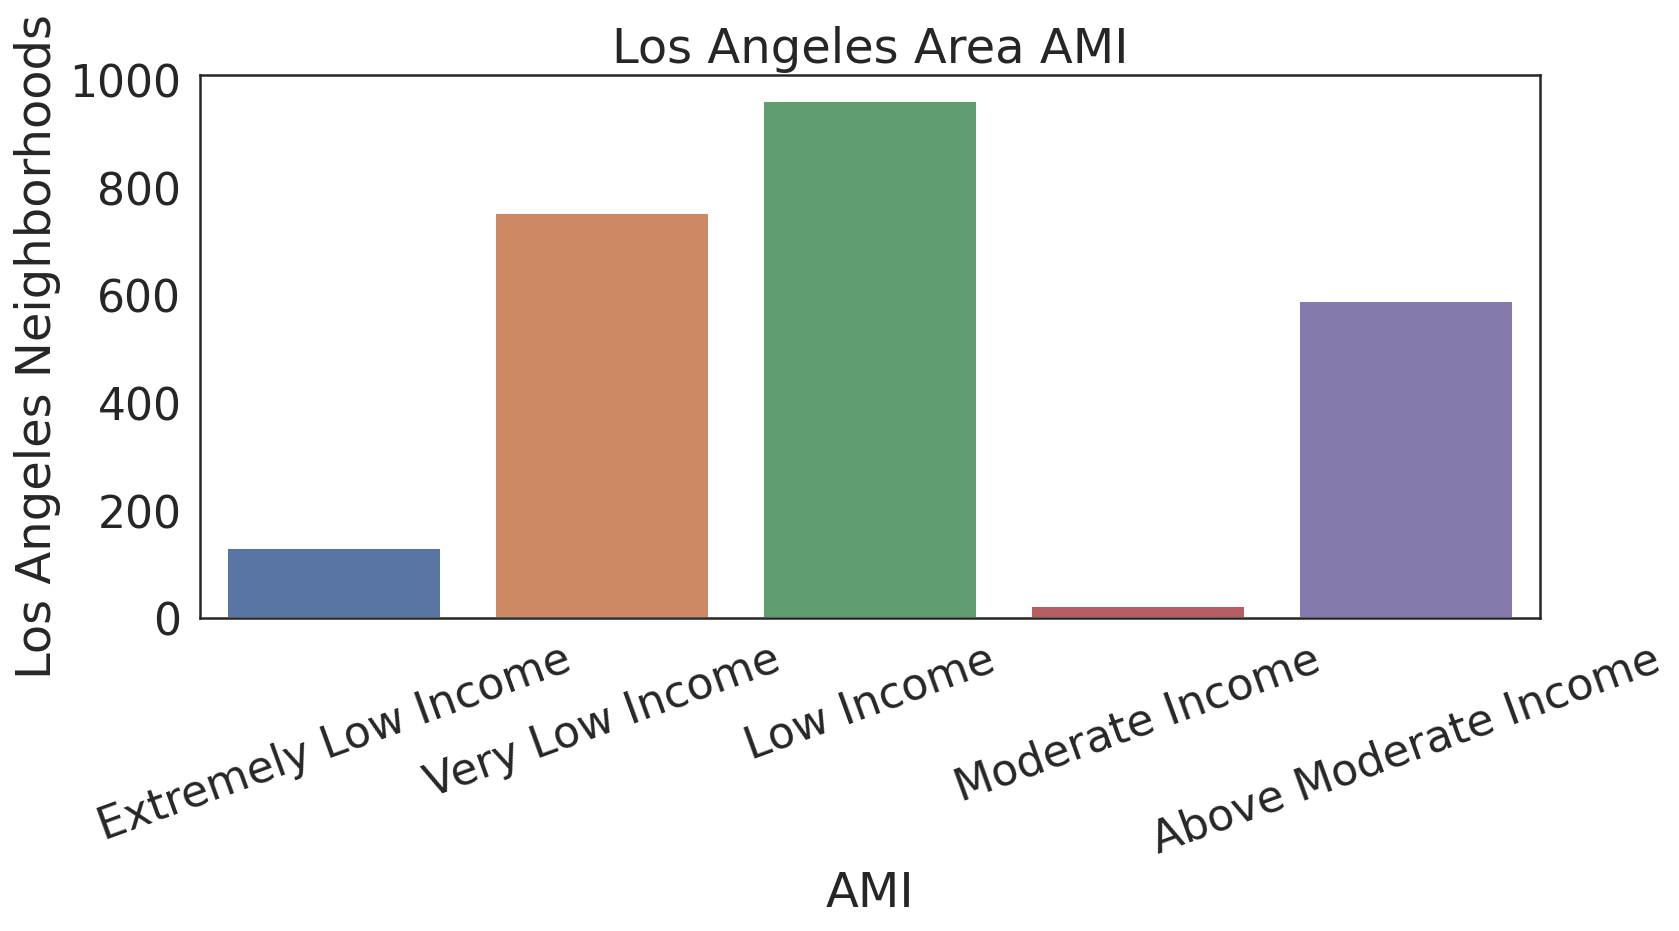

In [85]:
f1b, ax = plt.subplots()
sns.countplot(data=ami, x = 'ami_category', order=['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income'])
ax.set_title('Los Angeles Area AMI')
ax.set_xlabel('AMI')
ax.set_ylabel('Los Angeles Neighborhoods')
plt.xticks(rotation = 20)
plt.show()

This figure shows how many of Los Angeles neighborhoods fall into the AMI categories. From this figure we can see that a big proportion of Los Angeles Neighborhoods are split between very low income and low income, while a small proportion fall within moderate income. This is a general representation of neighborhood incomes in Los Angeles, meaning that the results from the graph before may be biased. A higher proportion of lower income neighborhoods means that more parking tickets may be found in lower income areas because there are more people those areas, and not because lower income areas are targeted more.

The AMI dataset categorized locations under specific AMI categories. When we merged our two datasets, we classified the location of the parking tickets based on income level, meaning that different areas in LA were grouped into certain income levels. Creating a similar barchar as above for these regions may provide a more detailed perspective on the number of parking tickets for various income levels

In [71]:
df['csa'].unique()

array(['Downtown', 'Westlake', 'Mar Vista', 'Temple-Beaudry', 'Melrose',
       'North Hollywood', 'Harbor Gateway', 'Historic Filipinotown',
       'West Los Angeles', 'Hancock Park', 'Brentwood', 'Sherman Oaks',
       'Mid-city', 'Hollywood Hills', 'Canoga Park', 'Panorama City',
       'Alsace', 'Little Tokyo', 'Leimert Park', 'Eagle Rock',
       'Boyle Heights', 'Van Nuys', 'Echo Park', 'Chinatown',
       'West Adams', 'Hyde Park', 'Reseda', 'Florence-Firestone',
       'Harvard Heights', 'Koreatown', 'Carthay', 'Wilmington',
       'Westchester', 'Wholesale District', 'Bel Air',
       'Cloverdale/Cochran', 'Venice', 'Hollywood', 'Vernon Central',
       'Toluca Lake', 'Palms', 'Atwater Village', 'Westwood',
       'Century City', 'San Pedro', 'Highland Park', 'Northridge',
       'Silverlake', 'Wilshire Center', 'El Sereno', 'Lincoln Heights',
       'Vermont Knolls', 'University Park', 'East Hollywood', 'Encino',
       'Pico-Union', 'Pacoima', 'Winnetka', 'Vermont Vista',
  

In [72]:
top_10_areas = df['csa'].value_counts()[:10]
top_10_areas

Downtown              1750
Hollywood             1389
Melrose               1315
West Los Angeles       804
Wholesale District     778
Venice                 718
North Hollywood        686
Westlake               663
Sherman Oaks           661
Boyle Heights          581
Name: csa, dtype: int64

In [73]:
top_10_income_tickets = df[df['csa'].isin(top_10_areas.index.tolist())].groupby(['csa', 'ami_category'])\
['Ticket number'].count().unstack(0).fillna(0).reset_index()
top_10_income = top_10_income_tickets.transpose()
top_10_income.columns = top_10_income.iloc[0]
top_10_income = top_10_income.drop(top_10_income.index[0]).reset_index()

Text(0, 0.5, 'Region')

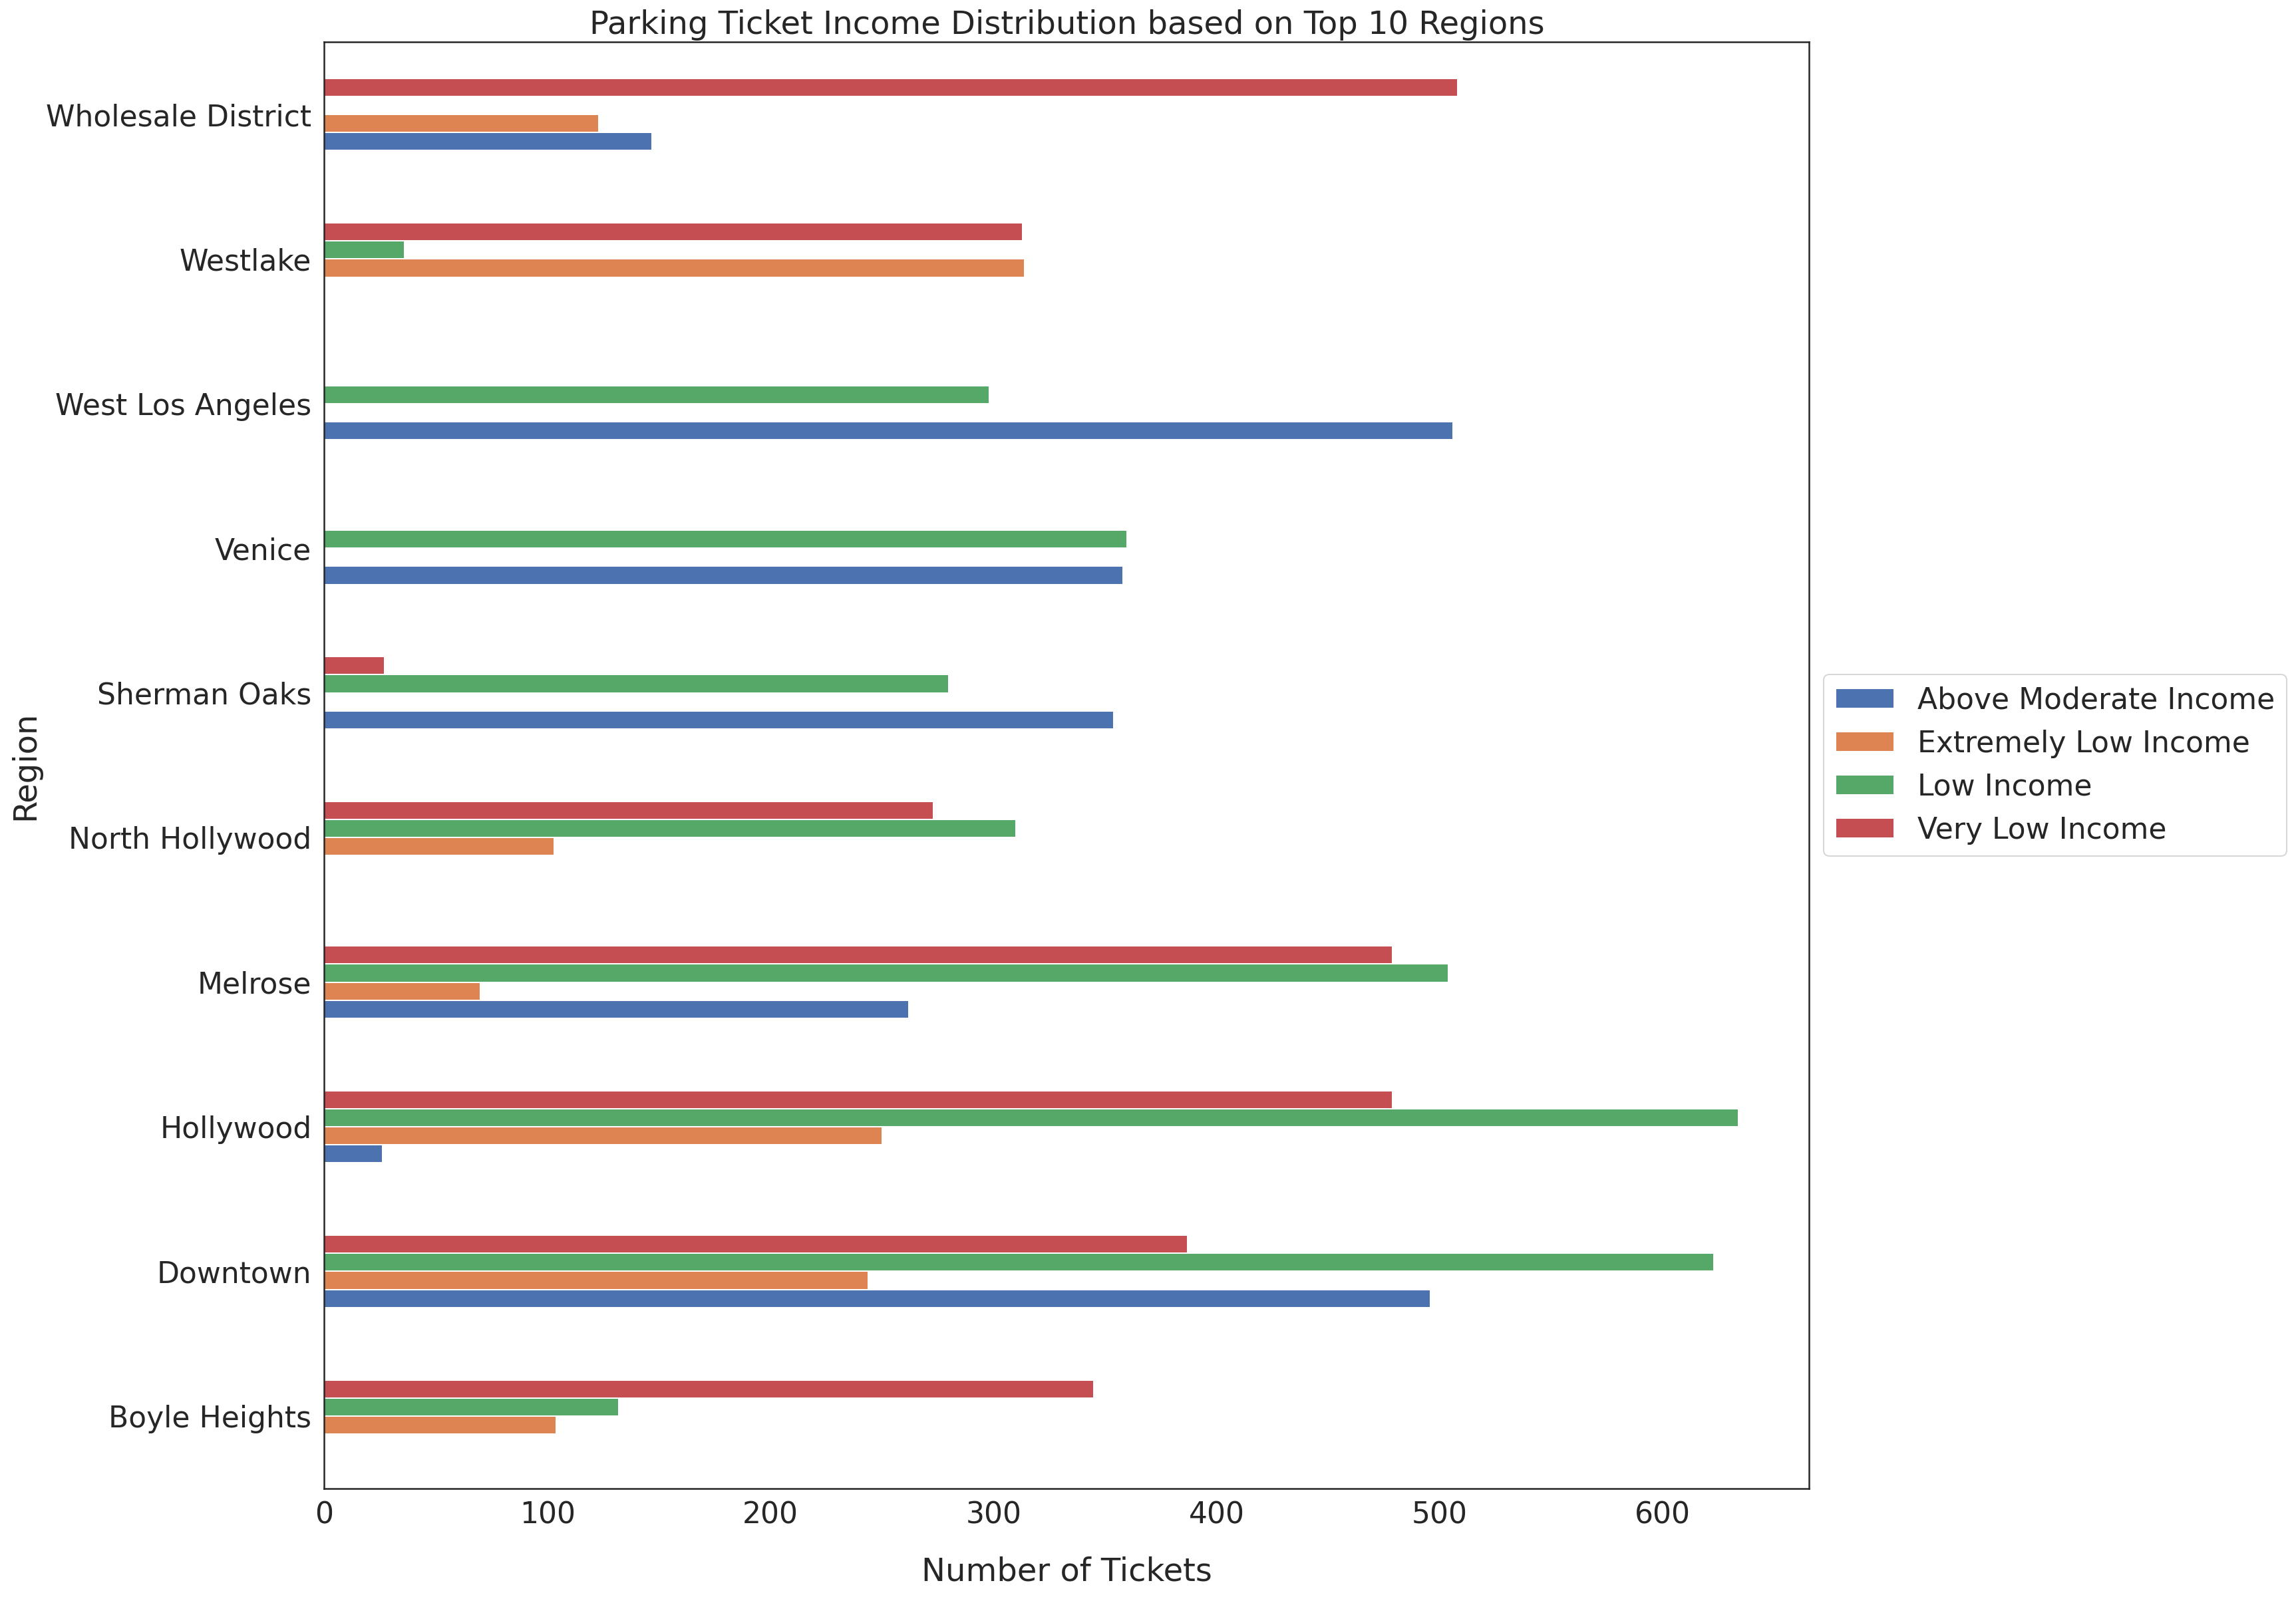

In [74]:
top_10_income.plot(x='csa',
                  kind='barh',
                  stacked=False,
                  title='Parking Ticket Income Distribution based on Top 10 Regions',
                  figsize=(20,20))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Number of Tickets', labelpad=20)
plt.ylabel('Region')

At first, this graph may be difficult to read but we believe it is important to see any variations in parking tickets within the same area. The barchart illustrates the number of parking tickets for each ami category in the regions with the top 10 number of parking tickets. Evidentally, there seems to be a lot of variation amongst the regions, indicating that many regions in LA are diverse in terms of their economic status, even in the same region. We can also see that many of the top parking ticket quanitites come from the very low income, low income, and above moderate income areas. Additionally, the places listed in the top 10 tend to be places of high traffic and tourism, which could be a factor playing into the number of tickets reported (people may need to park in numerous locations when traveling to LA). As such, these parking tickets may not be representative of the income levels in the area, since people from all over may be visiting these regions.

In [75]:
bottom_10_areas = df['csa'].value_counts()[-10:]
bottom_10_areas

Shadow Hills           2
Carson                 2
Willowbrook            2
Burbank                2
El Segundo             1
Palisades Highlands    1
West Hollywood         1
Inglewood              1
Lynwood                1
West Chatsworth        1
Name: csa, dtype: int64

In [76]:
bottom_10_income_tickets = df[df['csa'].isin(bottom_10_areas.index.tolist())].groupby(['csa', 'ami_category'])\
['Ticket number'].count().unstack(0).fillna(0).reset_index()
bottom_10_income = bottom_10_income_tickets.transpose()
bottom_10_income.columns = bottom_10_income.iloc[0]
bottom_10_income = bottom_10_income.drop(bottom_10_income.index[0]).reset_index()

In [77]:
bottom_10_income.plot(x='csa',
                     kind='barh',
                     stacked=False,
                     title='Parking Ticket Income Distribution based on Bottom 10 Regions',
                     figsize=(20,20))
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Region')
plt.ylabel('Number of Tickets', labelpad=20)

Text(0, 0.5, 'Number of Tickets')

This graph illustrates the number of parking tickets for each ami category in the regions with the bottom 10 number of parking tickets, which is why there are significantly less datapoints. The data is mostly made up of low income and above moderate income levels, with some very low income as well. However, there is no data for extremely low income. These trends could be explained by the fact that a majority of these regions are suburban or less-populated, so there are less people (and travelers) that park in the area. Something interesting to consider, though, is that in both this graph and the graph above, moderate income was not included.

In order to further look into any possible confounding variables for number of parking tickets in different economic areas, we can investigate the case of travelers parking in LA neighborhoods and cities. Since people vacationing in LA may not identify with the ami category of the area they parked in, this may blur the line between number of parking tickets and economic status. For our analysis, we will be assuming that cars with plates not from California are travelers.

In [78]:
print('Total Parking Tickets: ', df.shape[0])
print('Parking Tickets for Travelers: ', df[df['RP State Plate'] != 'CA'].shape[0])
print('Proportion of Traveler Tickets: ', df[df['RP State Plate'] != 'CA'].shape[0]/df.shape[0])

Total Parking Tickets:  24646
Parking Tickets for Travelers:  1766
Proportion of Traveler Tickets:  0.0716546295544916


Seems that only 7% of the parking tickets appear to be from people traveling. This is promising since our main focus is to pinpoint a relationship between the number of parking tickets and economic status. Let's inspect the trends in the traveler dataframe to see how travelers may impact our overall data.

In [79]:
travelers = df[df['RP State Plate'] != 'CA']['ami_category'].value_counts()[['Extremely Low Income', \
                                                                            'Very Low Income', 'Low Income', \
                                                                            'Moderate Income', \
                                                                            'Above Moderate Income']]

traveler_tickets = {}
for i in travelers.index:
    traveler_tickets[i.replace(' Income', '')] = travelers[i]
    
traveler_tickets

{'Extremely Low': 201,
 'Very Low': 511,
 'Low': 583,
 'Moderate': 16,
 'Above Moderate': 455}

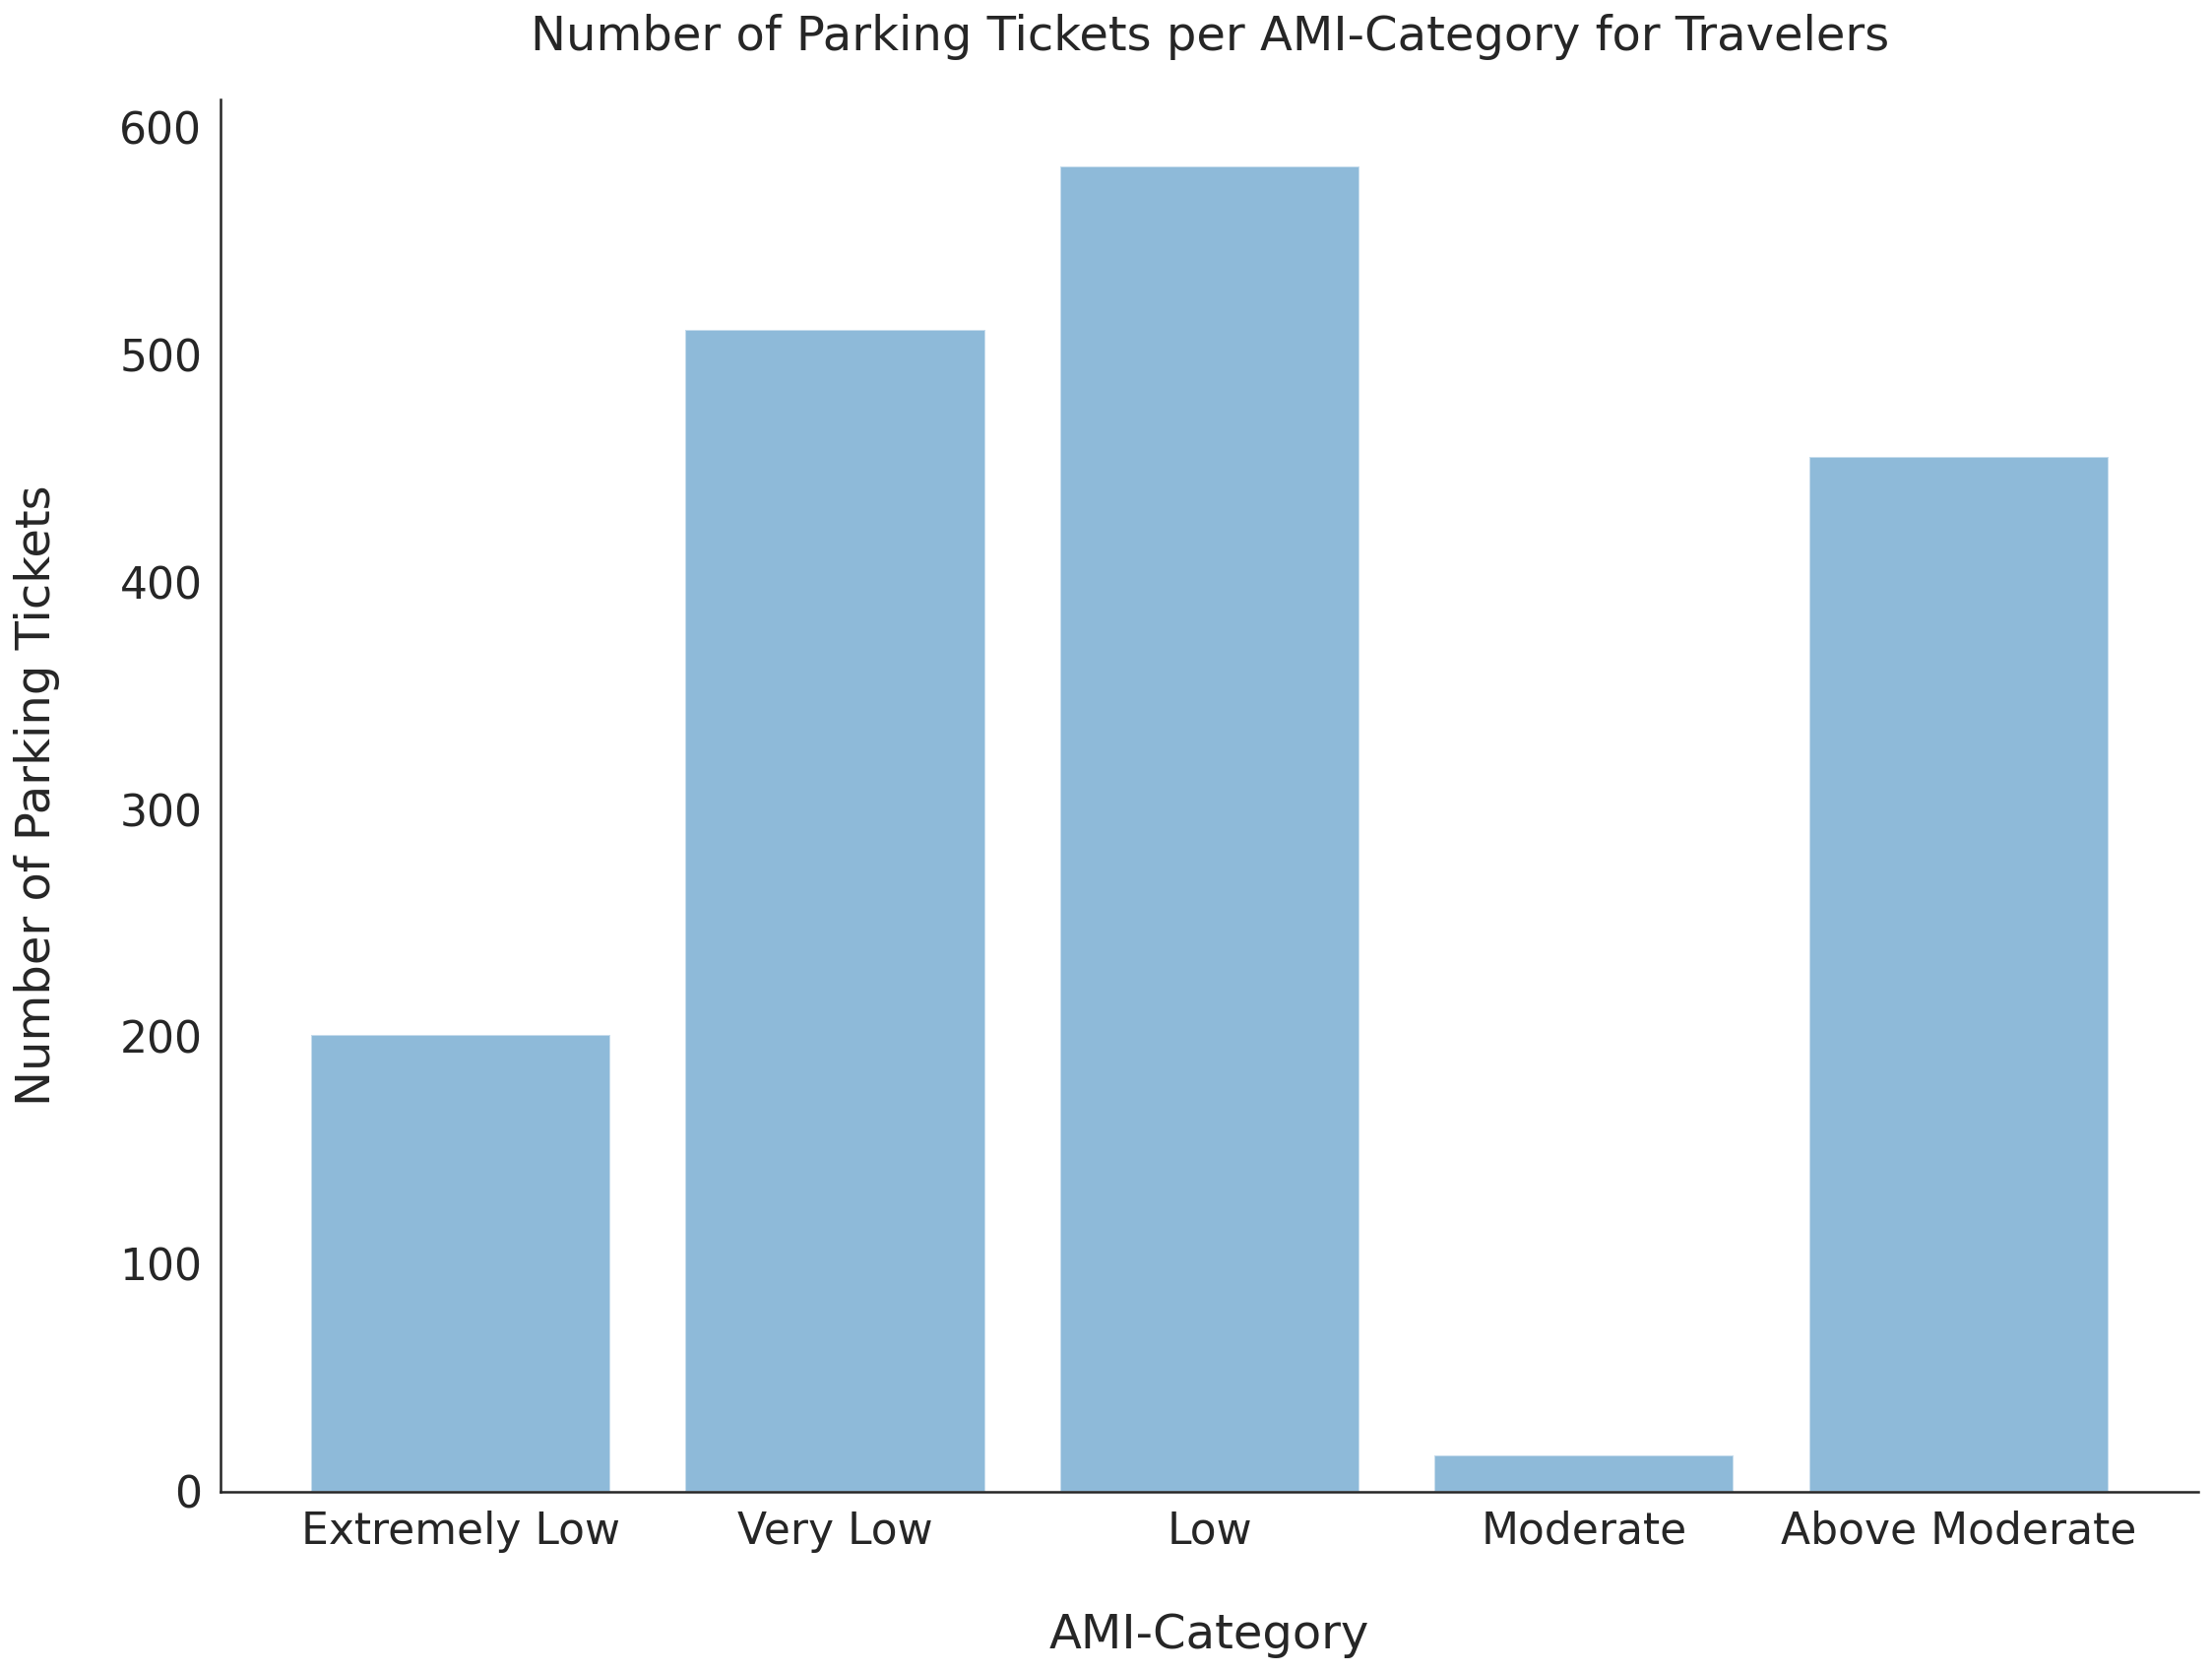

In [80]:
f3, ax = plt.subplots(figsize=(18,13))
ax.bar(traveler_tickets.keys(), traveler_tickets.values(), width=0.8, color='tab:blue', alpha=0.5)
ax.set_xlabel('AMI-Category', labelpad=30)
ax.set_ylabel('Number of Parking Tickets', labelpad=30)
ax.set_title('Number of Parking Tickets per AMI-Category for Travelers', pad=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Seems to follow a very similar trend to our barchart for all of the data. Does this graph look different for only California plates?

In [81]:
non_travelers = df[df['RP State Plate'] == 'CA']['ami_category'].value_counts()[['Extremely Low Income', \
                                                                                'Very Low Income', 'Low Income', \
                                                                                'Moderate Income', \
                                                                                'Above Moderate Income']]
non_traveler_tickets = {}
for i in non_travelers.index:
    non_traveler_tickets[i.replace(' Income', '')] = non_travelers[i]

non_traveler_tickets

{'Extremely Low': 2772,
 'Very Low': 7932,
 'Low': 7056,
 'Moderate': 214,
 'Above Moderate': 4906}

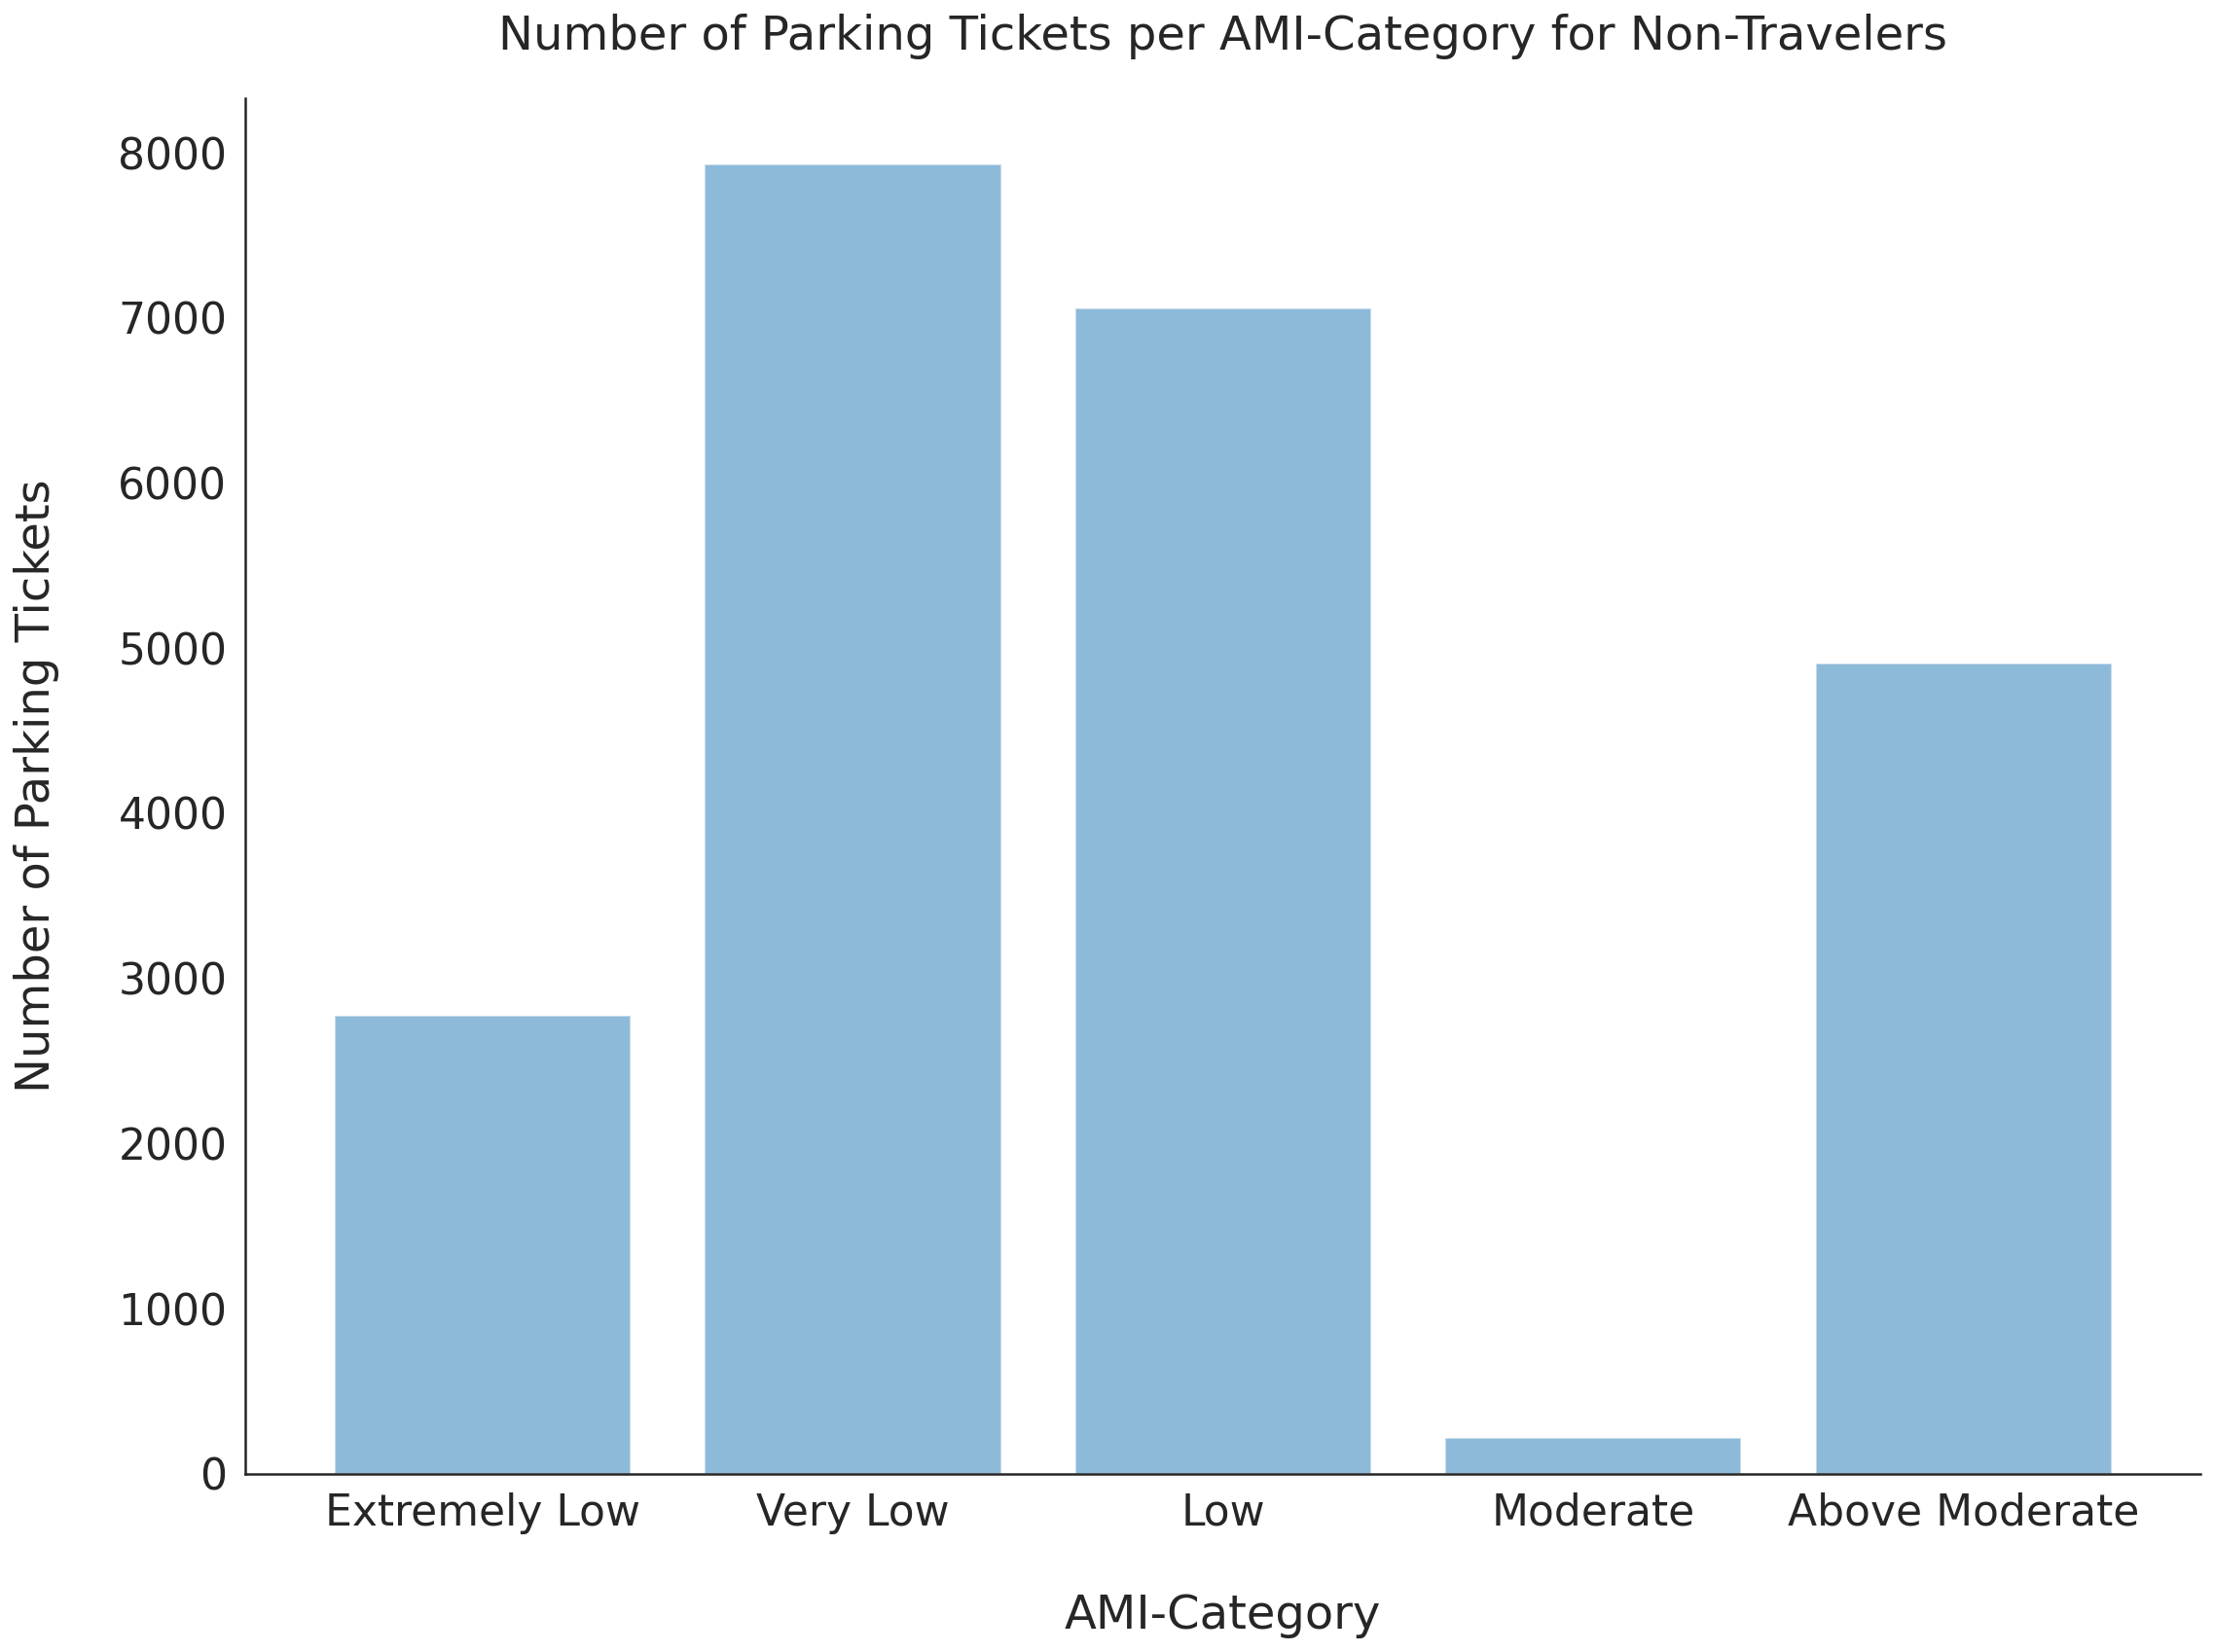

In [86]:
f4, ax = plt.subplots(figsize=(18,13))
ax.bar(non_traveler_tickets.keys(), non_traveler_tickets.values(), width=0.8, color='tab:blue', alpha=0.5)
ax.set_xlabel('AMI-Category', labelpad=30)
ax.set_ylabel('Number of Parking Tickets', labelpad=30)
ax.set_title('Number of Parking Tickets per AMI-Category for Non-Travelers', pad=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Except for some variation in the very low column, travelers and non-travelers show the same overall trend. Although we can't be for certain that the traveler 'fits' the ami-category of the place they parked, we know that cars with plates from other states don't exhibit any special treatment from the police force in our data.

In an attempt to divulge the economic status of the people parking, we can take a look at the type of car. According to our hypothesis, there should be less parking tickets for more expensive cars.

In [87]:
bottom_10_cars = df['Make'].value_counts()[-10:]
print(bottom_10_cars)

HYND    1
HYU     1
INF     1
SUBU    1
TESL    1
SAAB    1
AUBU    1
MIT     1
LROV    1
BUGA    1
Name: Make, dtype: int64


Since the count for the number of parking tickets is the same, we won't be making a barchart for this distribution, instead, our main focus is on the type of car. There is a great amount of variety in the types of cars and their economic standing. For example, the Tesla is more expensive, but then there is Saab which tends to be cheaper. Perhaps there are less parking tickets for these cars, simply because they are more rare. Let's take a look at the top 20 cars instead.

In [88]:
top_20_cars = df['Make'].value_counts()[:20].sort_values(ascending=True)

top_20_cars_tickets = {}
for i in top_20_cars.index:
    top_20_cars_tickets[i] = top_20_cars[i]

top_20_cars_tickets

{'ACUR': 272,
 'GMC': 325,
 'INFI': 328,
 'OTHR': 335,
 'SUBA': 350,
 'MAZD': 447,
 'AUDI': 520,
 'JEEP': 667,
 'LEXS': 669,
 'KIA': 711,
 'DODG': 750,
 'HYUN': 783,
 'VOLK': 813,
 'MERZ': 1077,
 'BMW': 1187,
 'CHEV': 1717,
 'NISS': 1793,
 'FORD': 1921,
 'HOND': 2933,
 'TOYT': 4192}

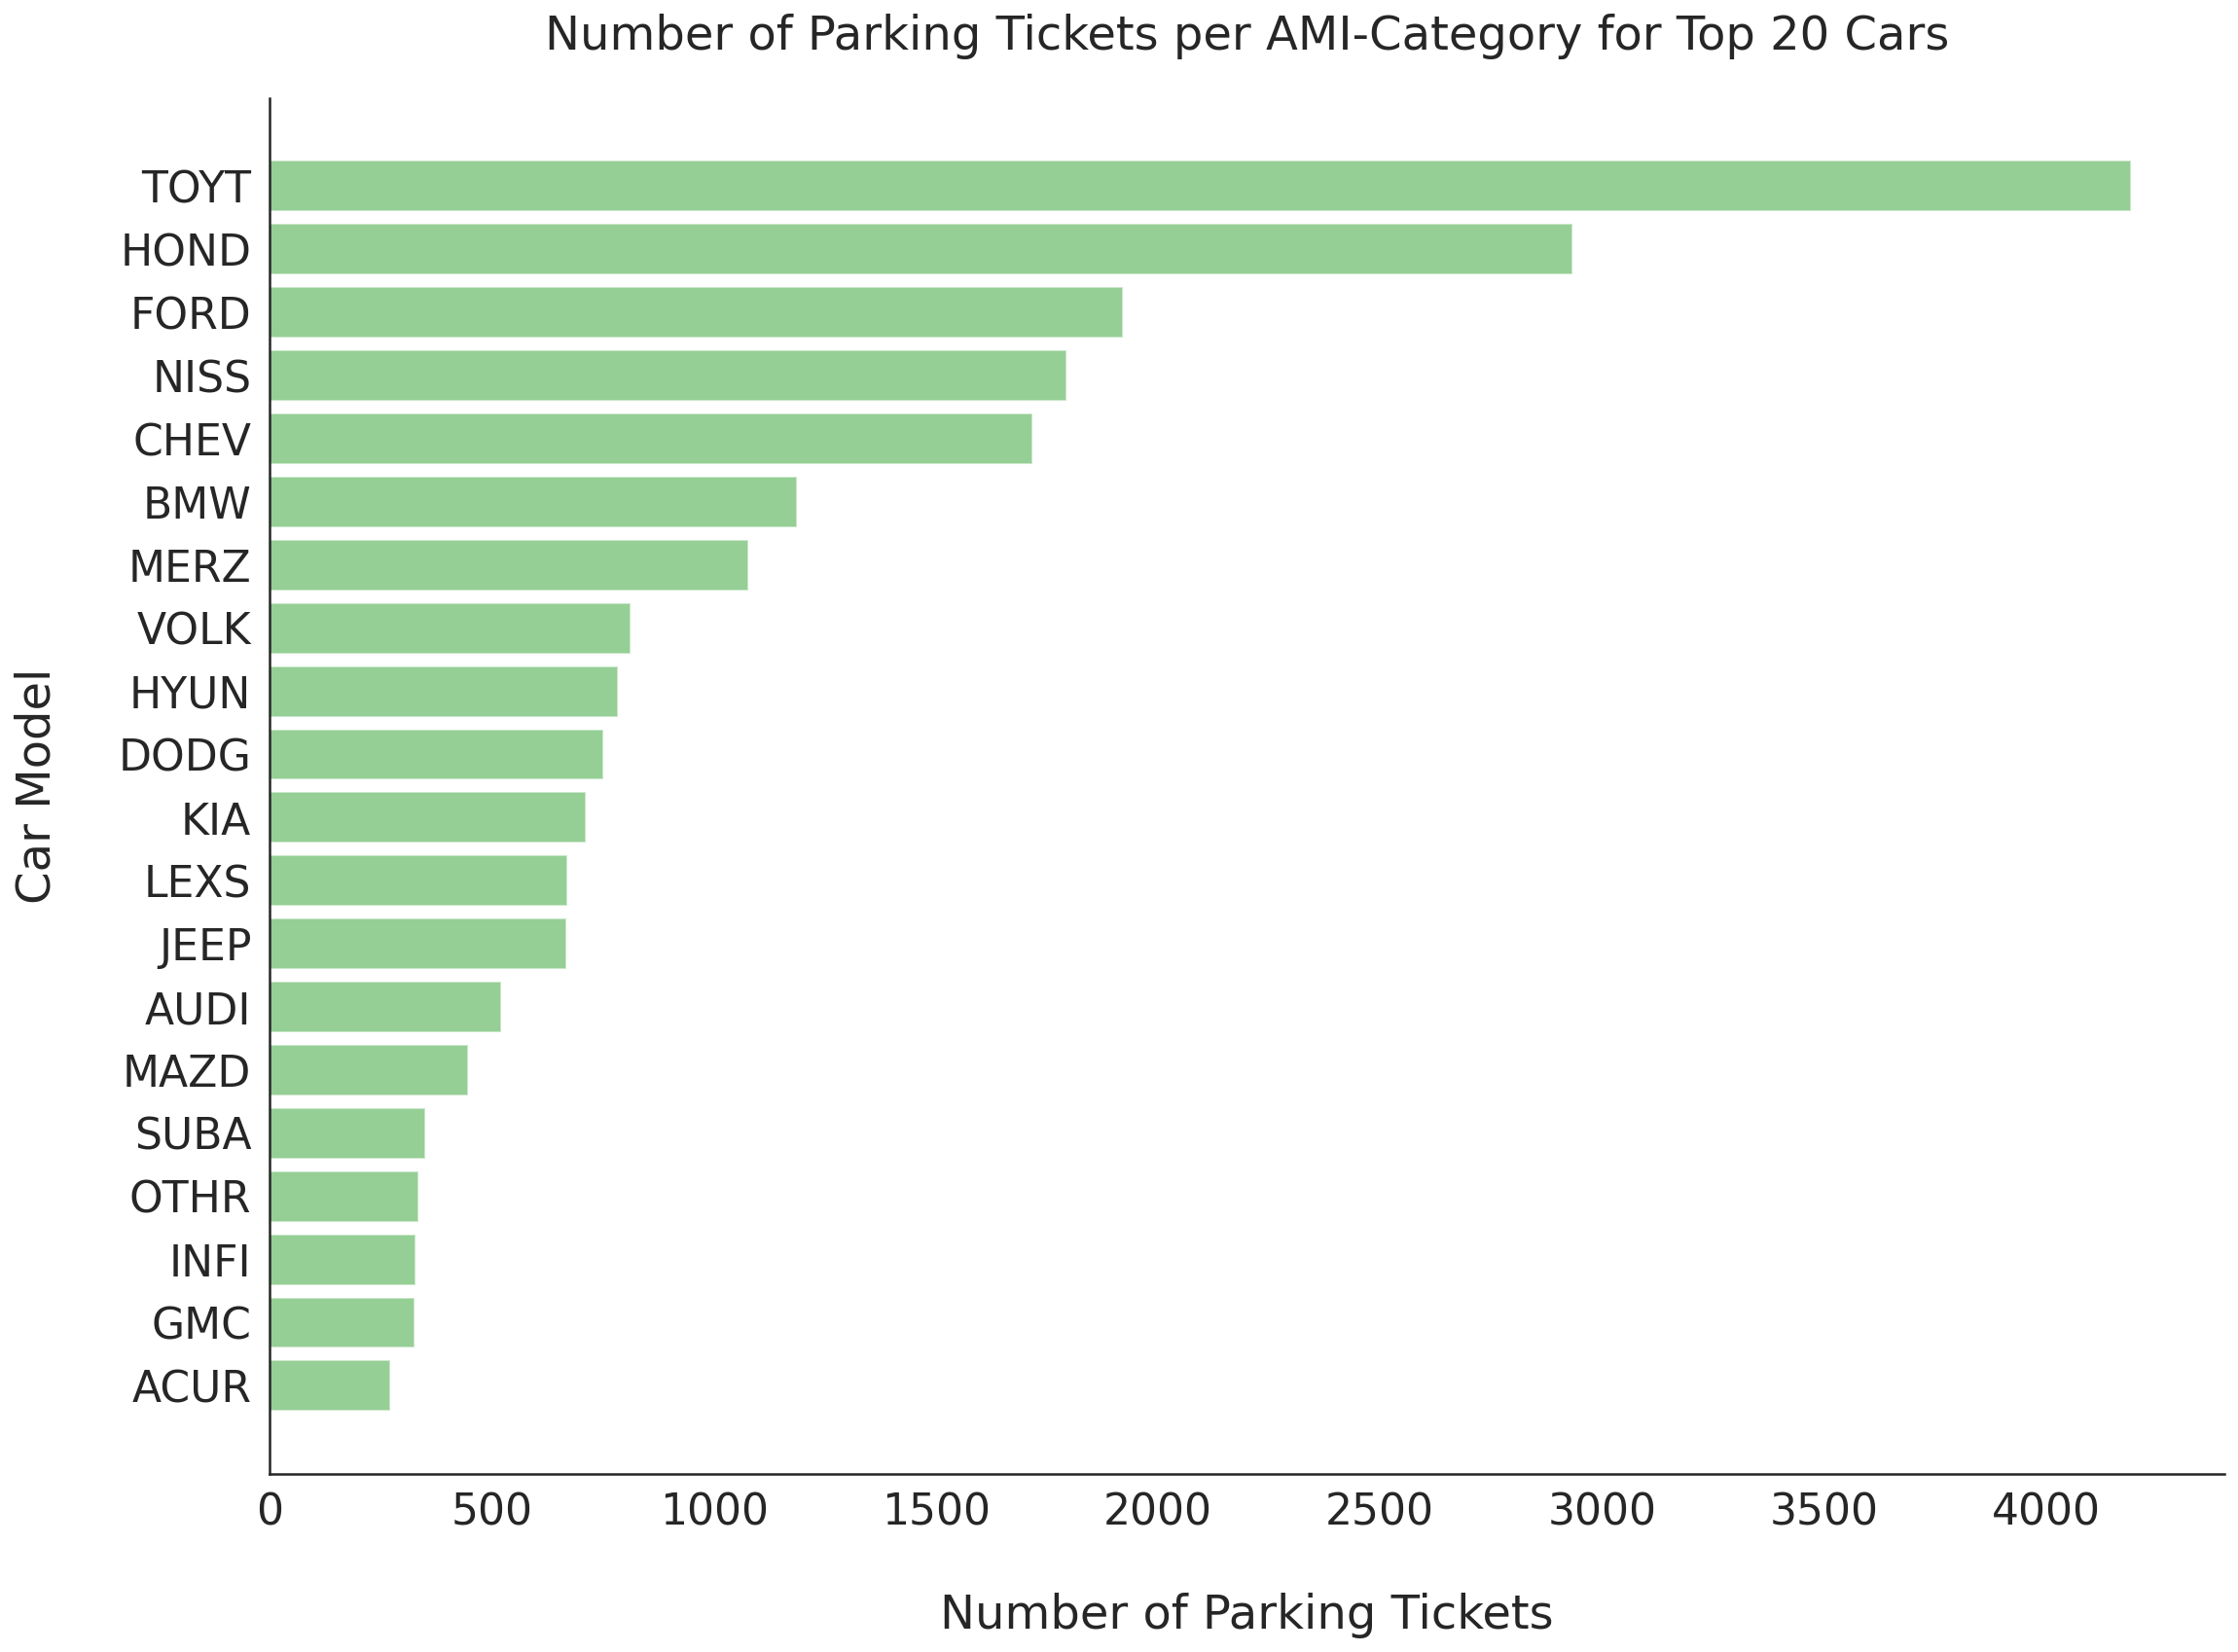

In [89]:
f5, ax = plt.subplots(1, 1, figsize=(18,13))
ax.barh(list(top_20_cars_tickets.keys()), list(top_20_cars_tickets.values()), color='tab:green', alpha=0.5)
ax.set_xlabel('Number of Parking Tickets', labelpad=30)
ax.set_ylabel('Car Model', labelpad=30)
ax.set_title('Number of Parking Tickets per AMI-Category for Top 20 Cars', pad=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

There seems to be a lot of tickets for Toyotas and Hondas. The first 5 types of cars are also affordable economical options, followed by more expensive cars (BMW and Mercedes), and then practical cars once again. While the majority of the cars are economic in the top 10, there are some more expensive cars that tend to get a lot of parking tickets as well. Additionally, more expensive car brands show up as the number of parking tickets decrease. It is important to consider, thought, that the make of the car does not necessarily describe how expensive the car is, for there are expensive Toyotas and cheaper Mazdas. Unfortunately, this graph does not give us helpful information. It seems as though the graph depicts the distribution of cars sold in LA instead of the distribution of parking tickets based on car. To get a more accurate account, we would need information on the amount and type of cars sold in LA, as well as the proportion differences between that data and the number of parking tickets.

In our background we acknowledged that multiple police reform measures have been made in the recent past. Accordingly, does the number of parking tickets change at all throughout each year?

In [90]:
df2018 = df.loc[df['year'] == 2018]
df2019 = df.loc[df['year'] == 2019]
df2020 = df.loc[df['year'] == 2020]
df2021 = df.loc[df['year'] == 2021]
df2022 = df.loc[df['year'] == 2022]

In [91]:
# 2018
i_t2018 = df2018['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]
income_tickets2018 = {}
for i in i_t2018.index:
    income_tickets2018[i.replace(' Income', '')] = i_t2018[i]

# 2019 
i_t2019 = df2019['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]
income_tickets2019 = {}
for i in i_t2019.index:
    income_tickets2019[i.replace(' Income', '')] = i_t2019[i]

#2020
i_t2020 = df2020['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]
income_tickets2020 = {}
for i in i_t2020.index:
    income_tickets2020[i.replace(' Income', '')] = i_t2020[i]

# 2021
i_t2021 = df2021['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]
income_tickets2021 = {}
for i in i_t2021.index:
    income_tickets2021[i.replace(' Income', '')] = i_t2021[i]

# 2022
i_t2022 = df2022['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]
income_tickets2022 = {}
for i in i_t2022.index:
    income_tickets2022[i.replace(' Income', '')] = i_t2022[i]

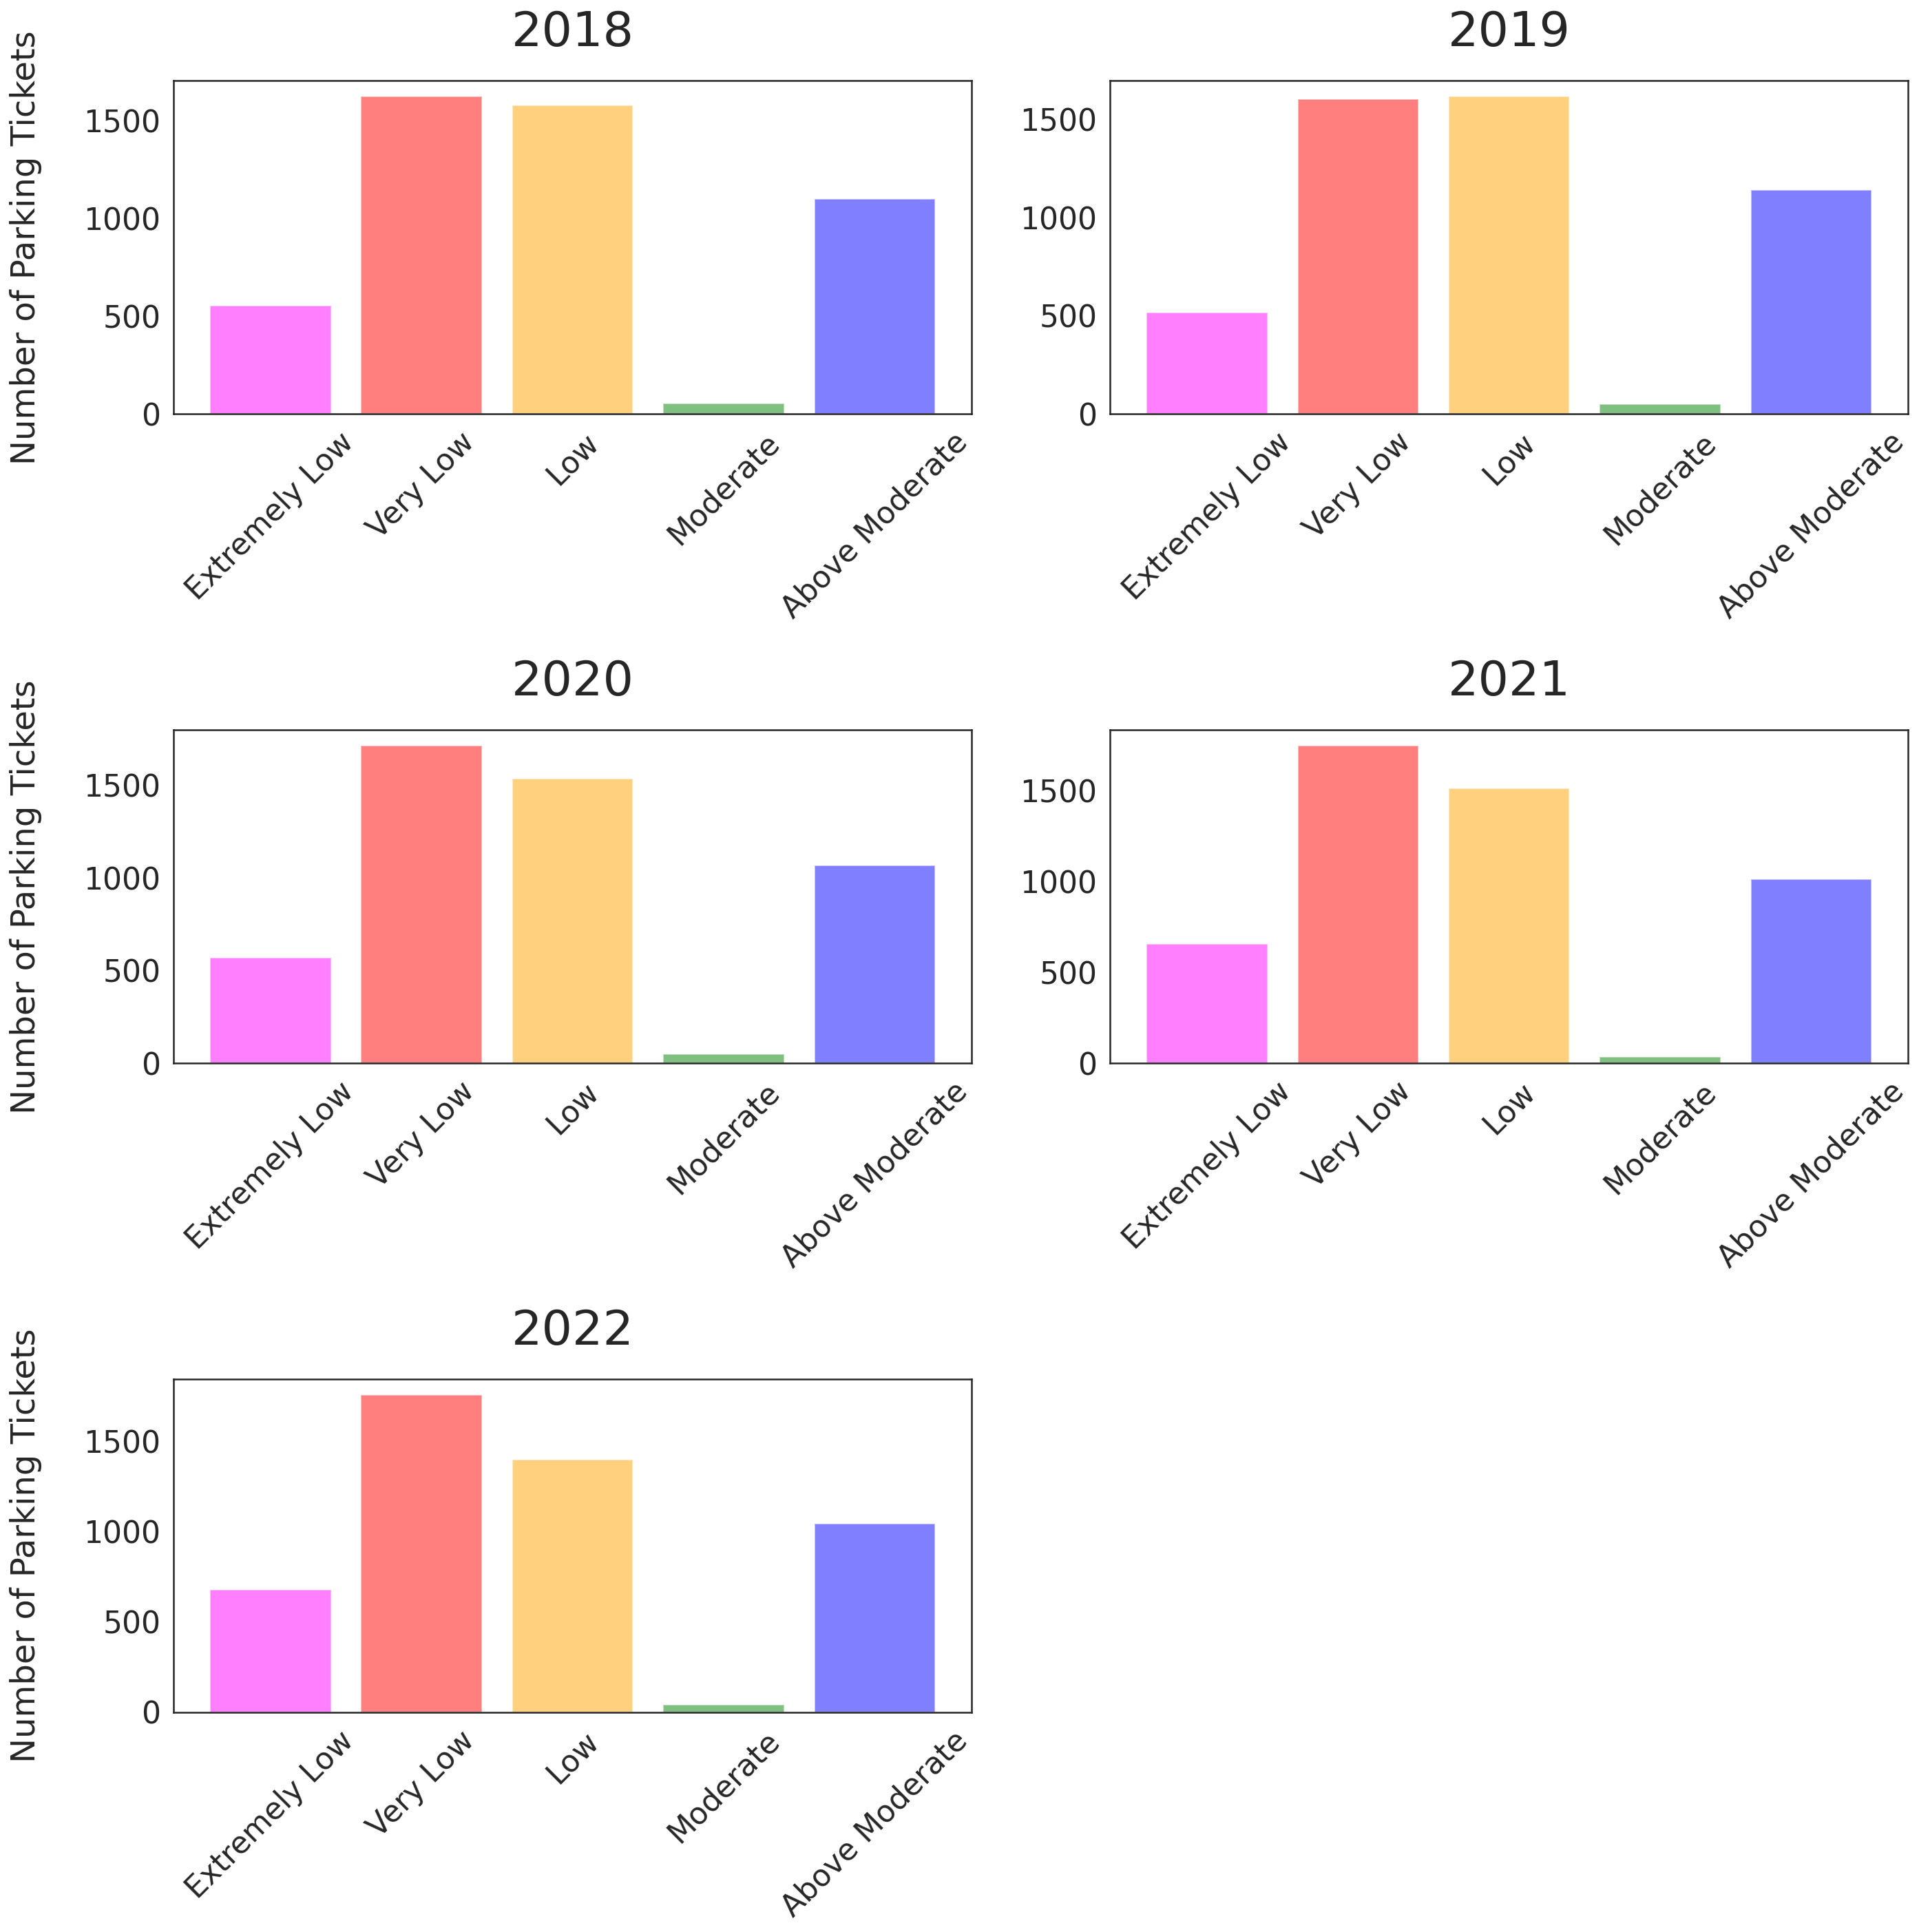

In [93]:
f6, ax = plt.subplots(3,2, figsize = (20,20))
ax[0,0].bar(income_tickets2018.keys(), income_tickets2018.values(), color=['magenta', 'red', 'orange', 'green', 'blue'], width=0.8, alpha=0.5)
ax[0,0].set_ylabel('Number of Parking Tickets', labelpad=30)
ax[0,0].tick_params(axis='x', labelrotation = 45)
ax[0,0].set_title('2018', fontsize = 35, pad=25);

ax[0,1].bar(income_tickets2019.keys(), income_tickets2019.values(), width=0.8, color=['magenta', 'red', 'orange', 'green', 'blue'], alpha=0.5)
ax[0,1].tick_params(axis='x', labelrotation = 45)
ax[0,1].set_title('2019', fontsize = 35, pad=25);

ax[1,0].bar(income_tickets2020.keys(), income_tickets2020.values(), width=0.8, color=['magenta', 'red', 'orange', 'green', 'blue'] , alpha=0.5)
ax[1,0].set_ylabel('Number of Parking Tickets', labelpad=30)
ax[1,0].tick_params(axis='x', labelrotation = 45)
ax[1,0].set_title('2020', fontsize = 35, pad=25);

ax[1,1].bar(income_tickets2021.keys(), income_tickets2021.values(), color=['magenta', 'red', 'orange', 'green', 'blue'], alpha=0.5)
ax[1,1].tick_params(axis='x', labelrotation = 45)
ax[1,1].set_title('2021', fontsize = 35, pad=25);

ax[2,0].bar(income_tickets2022.keys(), income_tickets2022.values(), color=['magenta', 'red', 'orange', 'green', 'blue'], alpha=0.5)
ax[2,0].set_ylabel('Number of Parking Tickets', labelpad=30)
ax[2,0].tick_params(axis='x', labelrotation = 45)
ax[2,0].set_title('2022', fontsize = 35, pad=25);

ax[2,1].set_visible(False)

f6.tight_layout()

This figure shows how many parking citations were issued in neighborhoods from each AMI category over the span of 5 years, since 2018. When examining each year, we can see that a consistent trend in parking citations is that the very low and low AMI category neighborhoods make up a large proportion of the citations each year. Moderate seems to be the smallest affected AMI category across all charts. As a result, by looking over a span of 5 years we can see very low and low AMI neighborhoods being the most affected by parking citations yearly.

Lastly, we have generated a heatmap in order to visualize where all the parking ticket citations are clustered in LA county.

In [94]:
sns.set(style="darkgrid")
%matplotlib inline
sns.set(style="whitegrid", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

#opening the vector map
shp_path = "geo_export_debb1d0f-c2fc-4ff4-b23a-7acd3741c263"
#reading the shape file by using reader function of the shape lib
sf = shp.Reader(shp_path)

# citation data
# stores mapping of CSA to lat and long
df1= pd.DataFrame()
df1[['Lat', 'Lon', 'csa']]=df[['Latitude', 'Longitude', 'csa']]
df1=df1.groupby('csa').nth(0)
df1

Lat         Lon
csa                                    
Adams-Normandie   34.030649 -118.304070
Alsace            34.033035 -118.360046
Angelino Heights  34.071854 -118.253644
Arleta            34.256644 -118.442410
Athens-Westmont   33.941623 -118.309015
...                     ...         ...
Willowbrook       33.931803 -118.230866
Wilmington        33.781392 -118.280976
Wilshire Center   34.076311 -118.295558
Winnetka          34.208327 -118.573700
Woodland Hills    34.166631 -118.590813

[149 rows x 2 columns]

In [95]:
# df with count by csa. index by csa and count
df2 = df[['csa','year']].groupby('csa').count()
df3=df1.join(df2, on='csa')
df3.index=df3.index.str.lower()

df3.head()

Lat         Lon  year
csa                                          
adams-normandie   34.030649 -118.304070    28
alsace            34.033035 -118.360046    54
angelino heights  34.071854 -118.253644    18
arleta            34.256644 -118.442410    27
athens-westmont   33.941623 -118.309015     4

In [96]:
nb = shp_path+'.shp'
print(nb)
regions = gpd.read_file(nb)


regions.sample(5)
regions['city_name']=regions['city_name'].str.lower()
regions.head(3)
regions2 = regions.copy()

geo_export_debb1d0f-c2fc-4ff4-b23a-7acd3741c263.shp


In [97]:
smap = gpd.read_file(nb)

# designate coordinate system
crs = {'init':'EPSG:4326'}
# zip x and y coordinates into single feature
pointcord = [Point(xy) for xy in zip(df3['Lon'], df3['Lat'])]
# create GeoPandas dataframe
#merged.plot('year', cmap=color, linewidth=0.8, edgecolor='0.8', figsize=(40,20))
geo_df = gpd.GeoDataFrame(df3, crs=crs, geometry = pointcord)

/home/sborsott/.local/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


(33.5, 34.5)

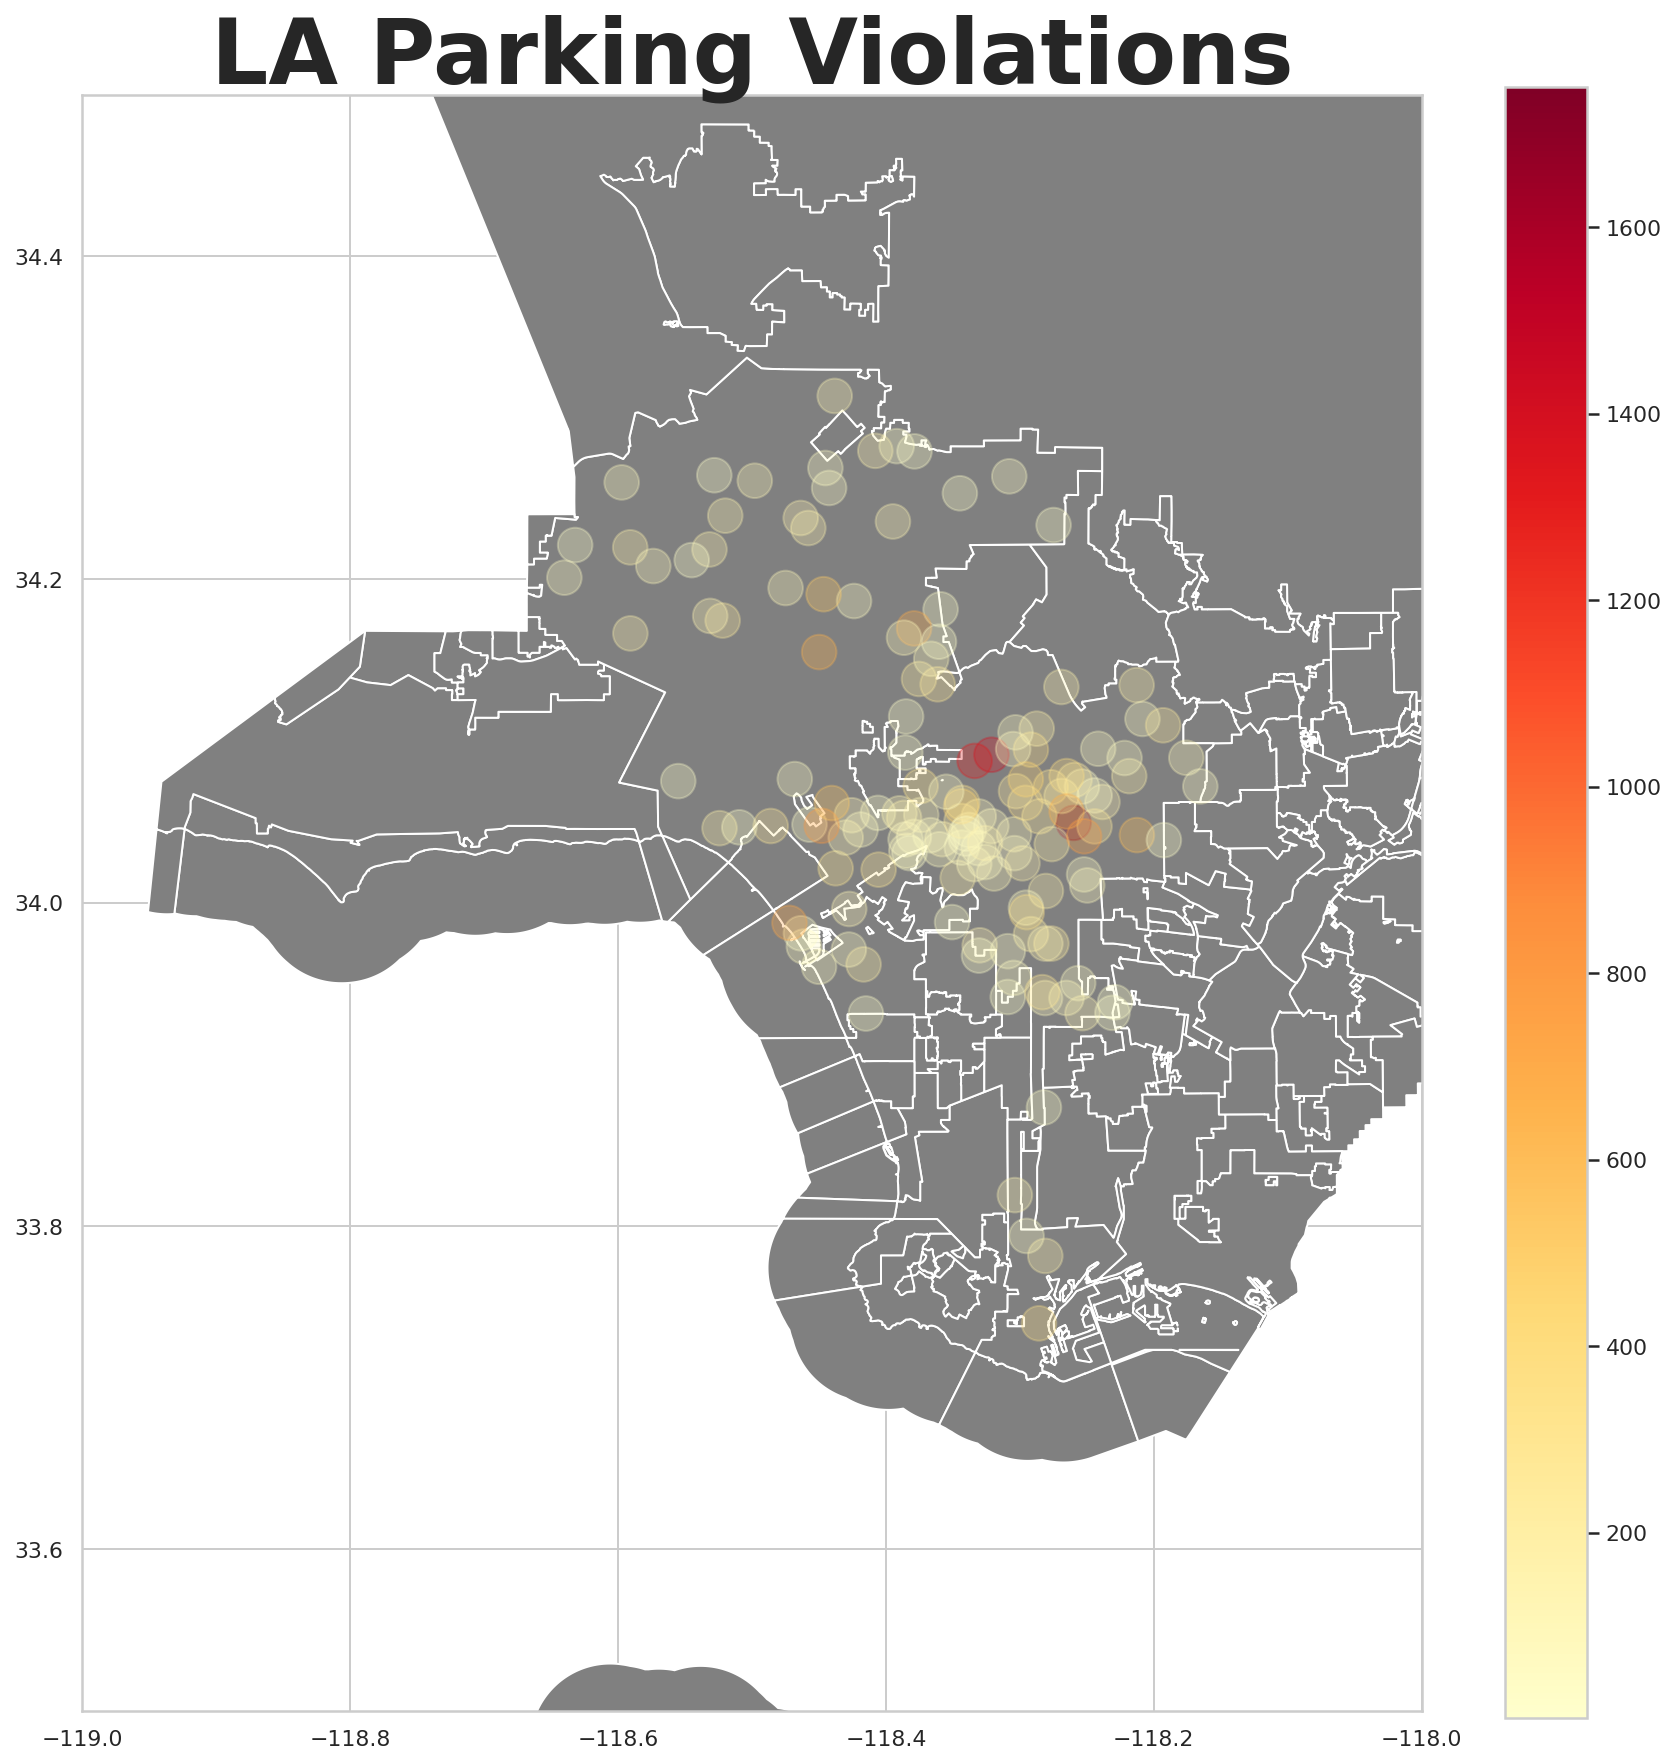

In [98]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
smap.plot(ax=ax, alpha=1,color='gray')
geo_df.plot(column='year',cmap='YlOrRd' , ax=ax, alpha=0.3, 
            legend=True,markersize=300)
# add title to graph
plt.title('LA Parking Violations', fontsize=45,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-119,-118)
plt.ylim( 33.5,34.5)

Above is a heatmap of the parking violations in Los Angeles. On the yellow side means a lower amount of parking tickets distributed and on the red side is a higher amount of parking tickets distributed. The key is shown with the map.

It appears that most of our data is clustered in central LA, which is made up of a high proportion of lower income areas. This could impact our findings since it means that more data was gathered from said areas, leading to a higher number of parking tickets in lower income regions. This may explain why we don't have much data from moderate income areas. We need to further analyze the relationship between the number of parking tickets in ami category and the amount of areas in each ami category from the original ami dataset.

### Chi-Squared Test

Null Hypothesis: The parking ticket AMI distribution is the same as the AMI distribution for LA

Alternative Hypothesis: The parking ticket AMI distribution is different from the AMI distribution for La

In [117]:
parking_freq = df['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]
parking_freq

Extremely Low Income     2973
Very Low Income          8443
Low Income               7639
Moderate Income           230
Above Moderate Income    5361
Name: ami_category, dtype: int64

In [118]:
parking_freq = parking_freq.rename_axis('unique_values').to_frame('counts')
parking_freq

counts
unique_values                
Extremely Low Income     2973
Very Low Income          8443
Low Income               7639
Moderate Income           230
Above Moderate Income    5361

In [121]:
ami_freq = ami['ami_category'].value_counts()[['Extremely Low Income', 'Very Low Income', \
                                        'Low Income', 'Moderate Income', 'Above Moderate Income']]\
.rename_axis('unique_values').to_frame('counts')
ami_freq

counts
unique_values                
Extremely Low Income      130
Very Low Income           753
Low Income                962
Moderate Income            24
Above Moderate Income     589

In [122]:
total = ami_freq['counts'].sum()
total

2458

In [123]:
ami_freq['ami_freq'] = ami_freq['counts'] / total

In [124]:
ami_freq

counts  ami_freq
unique_values                          
Extremely Low Income      130  0.052889
Very Low Income           753  0.306347
Low Income                962  0.391375
Moderate Income            24  0.009764
Above Moderate Income     589  0.239626

In [125]:
total_parking = parking_freq['counts'].sum()
total_parking

24646

In [126]:
expected_freq = []
for ind in parking_freq.index:
    expected = total_parking * ami_freq.loc[ind, 'ami_freq']
    expected_freq.append(expected)
parking_freq['expected count'] = expected_freq
parking_freq

counts  expected count
unique_values                                
Extremely Low Income     2973     1303.490643
Very Low Income          8443     7550.218877
Low Income               7639     9645.830757
Moderate Income           230      240.644426
Above Moderate Income    5361     5905.815297

In [137]:
a = parking_freq['counts']

In [138]:
b = parking_freq['expected count']

In [143]:
# t test for each category
((a - b)**2 / b)

unique_values
Extremely Low Income     2138.305717
Very Low Income           105.567553
Low Income                417.524399
Moderate Income             0.470835
Above Moderate Income      50.259565
dtype: float64

In [144]:
chisquare(f_obs = parking_freq['counts'], f_exp=parking_freq['expected count'])

Power_divergenceResult(statistic=2712.1280690454114, pvalue=0.0)

Based on the chi-squared test above, we would reject the null hypothesis that the parking ticket ami distribution is the same as the ami distribution of LA regions. This means that the amount of parking tickets for each ami can be explained by some other variable and not by the distribution of data from the original ami dataset. 

# Ethics & Privacy

The intention of our project was to identify potential socio-economic biases present in the San Diego police force by investigating the frequency and severity of parking citations within different communities of varying demographics. In doing so, numerous ethical concerns could arise on the logistical scale, as well as on the broader global scale. 

First off, our categorization of different areas may have held some bias. We distinguished areas based on their median salaries (ami) with the intention of illustrating socioeconomic status for Yet, just because a parking ticket was given in that area does not necessarily mean that the person is associated with that area. The person may have parked there for an event or for vacation, meaning that people with higher income levels may be considered low income according to our parameterization. As such, we plan to find a dataset that contains information on the type of car, which may be an indicator of economic status. 

Another ethical concern may have surfaced during the data collection phase. We utilized data that has information on parking citations in specific locations, therefore, we needed to prevent bias caused by disproportionate geospatial data. If the only data for an area was from the same block (since police may check all of the cars in only a handful of parking lots), we would be wrongly generalizing parking violations for the whole area. In order to take into account the potential imbalances in geospatial data, we mapped out the data points according to their longitude and latitude points so that we could pinpoint any clusters of data. We found that there was some clustering in central LA, as well as a significantly lower amount of moderate income data, so our data may indeed be biased, meaning our conclusion could be faulty. If not enough data was taken from higher income areas, then our result that lower income areas are more heavily citated may be incorrect.

Ethical considerations on the global scale are important to determine as well. Based on the findings of our research, social inequalities in our society have come to light. More people are given parking violations in lower income neighborhoods. This could be attributed to higher police monitoring because of the criminalization of certain races that have been systematically discriminated against throughout history. Yet, this may also not be the case. More tickets may just mean that more people in that area are committing parking violations and that the same amount of monitoring is taking place regardless of the area’s socioeconomic status. We hoped to have mitigated this issue through our parameterization of ‘crime’. Parking tickets tend to be minor traffic violations that are typically very common. As our background research depicts, parking citations are extremely recurrent throughout California. Not to mention, parking citations are a major issue in our own UCSD campus. In other words, the mild nature of parking tickets and the common need for parking in California suggests that improper parking can occur anywhere. While we cannot fully ensure that this is the case, we anticipate that our parameterization balances the levels of criminality within the areas since we are not addressing crimes that may be provoked from poverty, but rather violations that are feasible by any driver. Additionally, one could also argue that people in lower income communities are more cautious about parking because they may not have the funds to pay for a violation that someone in a higher income area would merely perceive as a small inconvenience.

# Conclusion & Discussion

The purpose of our project was to analyze the correlation between the amount of parking tickets issued in several Los Angeles neighborhoods and demographics which include previously mentioned socioeconomic status and ethnic makeup. Before coming to a thorough conclusion for our project, we had to consider possible limitations of our work. A factor we took into consideration was the possibility that cars in these areas were not necessarily owned by residents. We analyzed this because it affected our overall data and concluded that about 7% of parking citations belonged to travelers. Numbers may vary since the data spans 5 years, but regardless it is difficult to track every car in the county. The data may not accurately represent communities since residency is hard to determine, and also many low income communities tend to have less cars than higher ones. Again, this was a difficult factor to track and would require additional research. 

As a result of our research, we were able to pinpoint specific patterns between neighborhoods and their AMI categories. With the use of bar graphs to aid visualizations, our results showed that the AMI categories that made up a large amount of the parking citations in the county were “low income” and “very low income”, which happened to also be populated by minorities. Moderate income levels and further made up a smaller percentage of the citations. To answer our questions of whether there was a correlation or not, there is no clear correlation between neighborhood demographics and parking citations datasets according to our test results. Despite the distributions being different, ticketing is more apparent in minority communities which are low income as opposed to higher income neighborhoods. This makes our work significant because it sheds light on a common issue low income minority communities face on a daily basis, poverty and over policing. High ticket rates may be a result of over policing, which then contributes to criminalization in the long run due to unaffordable parking citations. 


# Team Contributions

- Sarah Borsotto - Ethics, Data Visualization, Final read-through and Revisions
- Niharika Malhotra - Cleaned ami dataset, generated heat map of parking citations in LA
- Marvin Ochoa Estrada - Overview, Conclusion, Presentation slides, Data visualization
- Ann Luong - Cleaned parking citations dataset, mapped parking citation location to its ami category, presentation slides
- Dhathry Doppalapudi - Background and prior work, Data Visualization, Presentations slides, Edited video